In [ ]:
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=014e1a4a3b48c762c31b46d6198cd540b6659dbfefd19c3663561531e803e7f7
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import pandas as pd
import math
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
import yfinance as yf 
AAPL=yf.download("AAPL", start="2002-01-01", end="2020-03-11",group_by="ticker")
MAST=yf.download("MA", start="2002-01-01", end="2020-03-11",group_by="ticker")
FORD=yf.download("F", start="2002-01-01", end="2020-03-11",group_by="ticker")
EXON=yf.download("XOM", start="2002-01-01", end="2020-03-11",group_by="ticker")
AAPL.dropna(axis=0,inplace=True)
MAST.dropna(axis=0,inplace=True)
FORD.dropna(axis=0,inplace=True)
EXON.dropna(axis=0,inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## SVR for stock price

### APPLE

In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,1.575000,1.664286,1.568571,1.664286,1.444668,132374200
2002-01-03,1.642857,1.696429,1.626429,1.684286,1.462029,153001800
2002-01-04,1.667143,1.710714,1.642143,1.692143,1.468849,102494000
2002-01-07,1.694286,1.714286,1.625000,1.635714,1.419867,111146000
2002-01-08,1.625000,1.646429,1.604286,1.615000,1.401886,112509600


In [ ]:
AAPL_SVR=AAPL.copy()

In [ ]:
AAPL_SVR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,1.575000,1.664286,1.568571,1.664286,1.444668,132374200
2002-01-03,1.642857,1.696429,1.626429,1.684286,1.462029,153001800
2002-01-04,1.667143,1.710714,1.642143,1.692143,1.468849,102494000
2002-01-07,1.694286,1.714286,1.625000,1.635714,1.419867,111146000
2002-01-08,1.625000,1.646429,1.604286,1.615000,1.401886,112509600


In [ ]:
memory_days=30
p_days=1
for i in range(p_days,memory_days+p_days):
  text=str(i)
  ad='Adj Close_'+text
  op='Open_'+text
  hi='High_'+text
  lo='Low_'+text
  cl='Close_'+text
  vo='Volume_'+text
  AAPL_SVR[[ad,op,hi,lo,cl,vo]]=AAPL_SVR[['Adj Close','Open','High','Low','Close','Volume']].shift(i);

In [ ]:
AAPL_SVR.dropna(axis=0, inplace=True)

In [ ]:
#AAPL_SVR.reset_index(inplace=True)

In [ ]:
AAPL_SVR.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

In [ ]:
AAPL_SVR.tail()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,302.739990,289.320007,303.670013,304.000000,285.799988,289.320007,79868900.0,298.809998,282.279999,301.440002,277.720001,298.809998,85349300.0,273.359985,257.260010,278.410004,256.369995,273.359985,106721200.0,273.519989,281.100006,286.000000,272.959991,273.519989,80151400.0,292.649994,286.529999,297.880005,286.500000,292.649994,49513700.0,288.079987,300.950012,302.529999,286.130005,288.079987,57668400.0,298.179993,297.260010,304.179993,...,327.850006,321.380005,324.339996,54057300.0,316.937805,312.600006,318.399994,312.190002,317.690002,40558500.0,308.218506,310.059998,311.769989,304.880005,308.950012,40485000.0,317.556335,320.250000,323.329987,317.519989,318.309998,36634400.0,318.474182,317.920013,319.559998,315.649994,319.230011,26118000.0,316.947815,318.579987,319.989990,317.309998,317.700012,25458100.0,315.820465,317.190002,319.019989,316.000000,316.570007,27710800.0
2020-03-05,292.920013,302.739990,296.440002,303.399994,293.130005,302.739990,54794600.0,289.320007,303.670013,304.000000,285.799988,289.320007,79868900.0,298.809998,282.279999,301.440002,277.720001,298.809998,85349300.0,273.359985,257.260010,278.410004,256.369995,273.359985,106721200.0,273.519989,281.100006,286.000000,272.959991,273.519989,80151400.0,292.649994,286.529999,297.880005,286.500000,292.649994,49513700.0,288.079987,300.950012,302.529999,...,324.089996,318.750000,323.869995,31685800.0,323.572052,324.450012,327.850006,321.380005,324.339996,54057300.0,316.937805,312.600006,318.399994,312.190002,317.690002,40558500.0,308.218506,310.059998,311.769989,304.880005,308.950012,40485000.0,317.556335,320.250000,323.329987,317.519989,318.309998,36634400.0,318.474182,317.920013,319.559998,315.649994,319.230011,26118000.0,316.947815,318.579987,319.989990,317.309998,317.700012,25458100.0
2020-03-06,289.029999,292.920013,295.519989,299.549988,291.410004,292.920013,46893200.0,302.739990,296.440002,303.399994,293.130005,302.739990,54794600.0,289.320007,303.670013,304.000000,285.799988,289.320007,79868900.0,298.809998,282.279999,301.440002,277.720001,298.809998,85349300.0,273.359985,257.260010,278.410004,256.369995,273.359985,106721200.0,273.519989,281.100006,286.000000,272.959991,273.519989,80151400.0,292.649994,286.529999,297.880005,...,322.679993,308.290009,309.510010,49897100.0,323.103180,320.540009,324.089996,318.750000,323.869995,31685800.0,323.572052,324.450012,327.850006,321.380005,324.339996,54057300.0,316.937805,312.600006,318.399994,312.190002,317.690002,40558500.0,308.218506,310.059998,311.769989,304.880005,308.950012,40485000.0,317.556335,320.250000,323.329987,317.519989,318.309998,36634400.0,318.474182,317.920013,319.559998,315.649994,319.230011,26118000.0
2020-03-09,266.170013,289.029999,282.000000,290.820007,281.230011,289.029999,56544200.0,292.920013,295.519989,299.549988,291.410004,292.920013,46893200.0,302.739990,296.440002,303.399994,293.130005,302.739990,54794600.0,289.320007,303.670013,304.000000,285.799988,289.320007,79868900.0,298.809998,282.279999,301.440002,277.720001,298.809998,85349300.0,273.359985,257.260010,278.410004,256.369995,273.359985,106721200.0,273.519989,281.100006,286.000000,...,313.489990,302.220001,308.660004,43496400.0,308.777191,320.929993,322.6

In [ ]:
dataset = AAPL_SVR.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4548, 180)

In [ ]:
Y.shape

(4548,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

#### Train on 75% of apple dataset


In [ ]:
# split into train and test sets
train_size = int(len(X) * 0.75)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(X),:]
print(len(X))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4548
3411 1137
3411 1137


In [ ]:
SVR_AAPL = SVR(kernel= 'rbf', C= 1, gamma= 0.1,epsilon=0.1) 
my_parameters={'C':[500 ,1000,2000],'epsilon':[ 0.001, 0.1, 0.5],'gamma':[ 0.001, 0.1, 0.5]}
#del SVR_Fore

In [ ]:
clf=GridSearchCV(estimator=SVR_AAPL, param_grid= my_parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
clf.fit(trainX, trainY)
bp_rf=clf.best_params_
print(bp_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'epsilon': 0.001, 'gamma': 0.001}


In [ ]:
SVR_AAPL = SVR(kernel= 'rbf', C= 2000, gamma= 0.001,epsilon=0.001) 
SVR_AAPL.fit(trainX, trainY) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict=SVR_AAPL.predict(testX)
predict1=SVR_AAPL.predict(trainX)

In [ ]:
# make predictions
testPredict = SVR_AAPL.predict(testX)

In [ ]:
testX.shape

(1137, 180)

In [ ]:
testPredict=testPredict.reshape(-1,1)

In [ ]:
testPredict.shape

(1137, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_SVR.head()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,1.525272,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,1.806429,1.720000,1.735714,86958200.0,1.529612,1.828571,1.855714,1.725000,1.762143,149394000.0,1.577974,1.792143,1.855714,...,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0,1.462029,1.642857,1.696429,1.626429,1.684286,153001800.0,1.444668,1.575000,1.664286,1.568571,1.664286,132374200.0
2002-02-15,1.481870,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,1.806429,1.720000,1.735714,86958200.0,1.529612,1.828571,1.855714,...,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0,1.462029,1.642857,1.696429,1.626429,1.684286,153001800.0
2002-02-19,1.402506,1.481870,1.752143,1.784286,1.703571,1.707143,65046800.0,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,1.806429,...,1.528571,1.492857,1.510714,103999000.0,1.305162,1.527857,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0
2002-02-20,1.434128,1.402506,1.697143,1.705000,1.605714,1.615714,97564600.0,1.481870,1.752143,1.784286,1.703571,1.707143,65046800.0,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,...,1.554286,1.515000,1.550000,72580200.0,1.311362,1.500714,1.528571,1.492857,1.510714,103999000.0,1.305162,1.527857,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0
2002-02-21,1.333063,1.434128,1.626429,1.657143,1.596429,1.652143,71360800.0,1.402506,1.697143,1.705000,1.605714,1.615714,97564600.0,1.481870,1.752143,

In [ ]:
AAPL_SVR.reset_index(inplace=True)
AAPL_SVR['Date'] = pd.to_datetime(AAPL_SVR['Date'])
AAPL_SVR.insert (1, 'Y', Y_n)
AAPL_SVR.set_index('Date',inplace=True)

In [ ]:
AAPL_predict=pd.DataFrame(AAPL_SVR.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

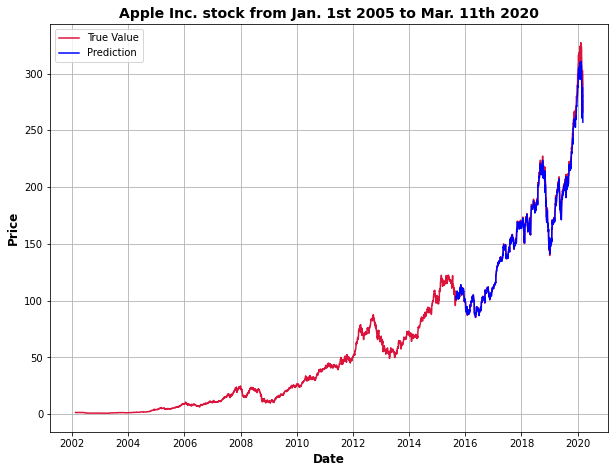

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_SVR['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

10.014278037359272

In [ ]:
def mean_absolute_percentage_error(testY_n, testPredict_n): 
     return np.mean(np.abs((testY_n - testPredict_n) / testY_n)) * 100

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.677741
dtype: float64

#### Train on the entire apple dataset

In [ ]:
# split into train and test sets
train_size = int(len(X) * 0.99)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(X),:]
print(len(X))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4548
4502 46
4502 46


In [ ]:
SVR_Fore = SVR(kernel= 'rbf', C= 1, gamma= 0.1,epsilon=0.1) 
my_parameters={'C':[500 ,1000,2000],'epsilon':[ 0.001, 0.1, 0.5],'gamma':[ 0.001, 0.1, 0.5]}
#del SVR_Fore

In [ ]:
clf=GridSearchCV(estimator=SVR_Fore, param_grid= my_parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
clf.fit(trainX, trainY)
bp_rf=clf.best_params_
print(bp_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'epsilon': 0.001, 'gamma': 0.001}


In [ ]:
SVR_Fore = SVR(kernel= 'rbf', C= 2000, gamma= 0.001,epsilon=0.001) 
SVR_Fore.fit(trainX, trainY) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict=SVR_Fore.predict(testX)
predict1=SVR_Fore.predict(trainX)

In [ ]:
# make predictions
testPredict = SVR_Fore.predict(testX)

In [ ]:
testX.shape

(46, 180)

In [ ]:
testPredict=testPredict.reshape(-1,1)

In [ ]:
testPredict.shape

(46, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_SVR.head()

,Y,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,1.550693,1.525272,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,1.806429,1.720000,1.735714,86958200.0,1.529612,1.828571,1.855714,1.725000,1.762143,149394000.0,1.577974,1.792143,...,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0,1.462029,1.642857,1.696429,1.626429,1.684286,153001800.0,1.444668,1.575000,1.664286,1.568571,1.664286,132374200.0
2002-02-15,1.525272,1.481870,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,1.806429,1.720000,1.735714,86958200.0,1.529612,1.828571,...,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0,1.462029,1.642857,1.696429,1.626429,1.684286,153001800.0
2002-02-19,1.481870,1.402506,1.481870,1.752143,1.784286,1.703571,1.707143,65046800.0,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,1.760000,1.669286,1.716429,88832800.0,1.506671,1.760714,...,1.528571,1.492857,1.510714,103999000.0,1.305162,1.527857,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0,1.468849,1.667143,1.710714,1.642143,1.692143,102494000.0
2002-02-20,1.402506,1.434128,1.402506,1.697143,1.705000,1.605714,1.615714,97564600.0,1.481870,1.752143,1.784286,1.703571,1.707143,65046800.0,1.525272,1.789286,1.802143,1.741429,1.757143,65042600.0,1.550693,1.766429,1.802857,1.760714,1.786429,78218000.0,1.532092,1.761429,1.788571,1.746429,1.765000,56070000.0,1.548833,1.709286,1.785714,1.695714,1.784286,99650600.0,1.489930,1.742857,...,1.554286,1.515000,1.550000,72580200.0,1.311362,1.500714,1.528571,1.492857,1.510714,103999000.0,1.305162,1.527857,1.560000,1.471429,1.503571,87200400.0,1.316322,1.515714,1.532857,1.446429,1.516429,113184400.0,1.342363,1.628571,1.637857,1.520000,1.546429,81958800.0,1.401886,1.625000,1.646429,1.604286,1.615000,112509600.0,1.419867,1.694286,1.714286,1.625000,1.635714,111146000.0
2002-02-21,1.434128,1.333063,1.434128,1.626429,1.657143,1.596429,1.652143,71360800.0,1.402506,1.697143,1.705000,1.605714,1.615714,97564600.0,1.481870,1.752

In [ ]:
AAPL_SVR.drop('Y',axis=1,inplace=True)

In [ ]:
AAPL_SVR.reset_index(inplace=True)
AAPL_SVR['Date'] = pd.to_datetime(AAPL_SVR['Date'])
AAPL_SVR.insert (1, 'Y', Y_n)
AAPL_SVR.set_index('Date',inplace=True)

In [ ]:
AAPL_predict=pd.DataFrame(AAPL_SVR.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

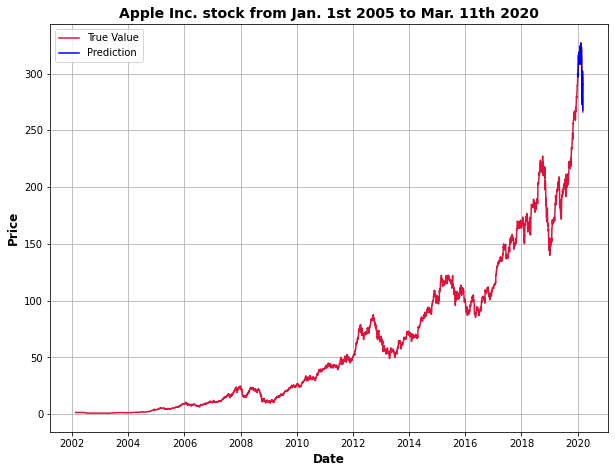

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_SVR['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.4593265174451058

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.171348
dtype: float64

### Mastercard

In [ ]:
MAST.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-05-25,4.030,4.605,4.020,4.600,3.453669,395343000
2006-05-26,4.630,4.674,4.411,4.493,3.373335,103044000
2006-05-30,4.497,4.498,4.285,4.400,3.303510,49898000
2006-05-31,4.435,4.536,4.435,4.494,3.374085,30002000
2006-06-01,4.493,4.810,4.490,4.751,3.567040,62344000


In [ ]:
MAST_SVR=MAST.copy()

In [ ]:
MAST_SVR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-05-25,4.030,4.605,4.020,4.600,3.453669,395343000
2006-05-26,4.630,4.674,4.411,4.493,3.373335,103044000
2006-05-30,4.497,4.498,4.285,4.400,3.303510,49898000
2006-05-31,4.435,4.536,4.435,4.494,3.374085,30002000
2006-06-01,4.493,4.810,4.490,4.751,3.567040,62344000


In [ ]:
memory_days=30
p_days=1
for i in range(p_days,memory_days+p_days):
  text=str(i)
  ad='Adj Close_'+text
  op='Open_'+text
  hi='High_'+text
  lo='Low_'+text
  cl='Close_'+text
  vo='Volume_'+text
  MAST_SVR[[ad,op,hi,lo,cl,vo]]=MAST_SVR[['Adj Close','Open','High','Low','Close','Volume']].shift(i);

In [ ]:
MAST_SVR.dropna(axis=0, inplace=True)

In [ ]:
MAST_SVR.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

In [ ]:
MAST_SVR.tail()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,302.359985,292.000000,314.589996,314.589996,290.829987,292.000000,8051100.0,306.739990,298.890015,306.959991,289.440002,306.739990,9688100.0,290.250000,274.890015,290.390015,273.549988,290.250000,12855500.0,285.820007,285.029999,297.450012,280.940002,285.820007,13814600.0,298.040009,302.000000,307.890015,297.890015,298.040009,9403300.0,302.890015,321.339996,323.230011,300.760010,302.890015,12715700.0,324.670013,317.510010,329.339996,...,324.440002,316.769989,320.320007,4389400.0,320.269989,315.799988,321.519989,315.459991,320.269989,3486200.0,315.769989,315.100006,319.359985,312.500000,315.769989,4367500.0,323.670013,326.570007,327.089996,321.660004,323.670013,3634700.0,324.980011,325.000000,325.250000,322.320007,324.980011,4188300.0,324.309998,324.950012,326.790009,324.119995,324.309998,3518500.0,321.929993,322.410004,325.660004,321.489990,321.929993,5998600.0
2020-03-05,290.730011,302.359985,299.109985,302.799988,292.750000,302.359985,6463800.0,292.000000,314.589996,314.589996,290.829987,292.000000,8051100.0,306.739990,298.890015,306.959991,289.440002,306.739990,9688100.0,290.250000,274.890015,290.390015,273.549988,290.250000,12855500.0,285.820007,285.029999,297.450012,280.940002,285.820007,13814600.0,298.040009,302.000000,307.890015,297.890015,298.040009,9403300.0,302.890015,321.339996,323.230011,...,324.700012,318.010010,324.459991,3512100.0,320.320007,323.000000,324.440002,316.769989,320.320007,4389400.0,320.269989,315.799988,321.519989,315.459991,320.269989,3486200.0,315.769989,315.100006,319.359985,312.500000,315.769989,4367500.0,323.670013,326.570007,327.089996,321.660004,323.670013,3634700.0,324.980011,325.000000,325.250000,322.320007,324.980011,4188300.0,324.309998,324.950012,326.790009,324.119995,324.309998,3518500.0
2020-03-06,287.010010,290.730011,295.709991,298.709991,288.239990,290.730011,6621300.0,302.359985,299.109985,302.799988,292.750000,302.359985,6463800.0,292.000000,314.589996,314.589996,290.829987,292.000000,8051100.0,306.739990,298.890015,306.959991,289.440002,306.739990,9688100.0,290.250000,274.890015,290.390015,273.549988,290.250000,12855500.0,285.820007,285.029999,297.450012,280.940002,285.820007,13814600.0,298.040009,302.000000,307.890015,...,324.459991,314.500000,315.940002,5586800.0,324.459991,319.000000,324.700012,318.010010,324.459991,3512100.0,320.320007,323.000000,324.440002,316.769989,320.320007,4389400.0,320.269989,315.799988,321.519989,315.459991,320.269989,3486200.0,315.769989,315.100006,319.359985,312.500000,315.769989,4367500.0,323.670013,326.570007,327.089996,321.660004,323.670013,3634700.0,324.980011,325.000000,325.250000,322.320007,324.980011,4188300.0
2020-03-09,262.010010,287.010010,282.690002,288.850006,278.619995,287.010010,7061500.0,290.730011,295.709991,298.709991,288.239990,290.730011,6621300.0,302.359985,299.109985,302.799988,292.750000,302.359985,6463800.0,292.000000,314.589996,314.589996,290.829987,292.000000,8051100.0,306.739990,298.890015,306.959991,289.440002,306.739990,9688100.0,290.250000,274.890015,290.390015,273.549988,290.250000,12855500.0,285.820007,285.029999,297.450012,...,325.480011,318.429993,324.519989,4242200.0,315.940002,323.140015,324.459991,314.500000,315.940002,5586800.0,324.

In [ ]:
dataset = MAST_SVR.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(3441, 180)

In [ ]:
Y.shape

(3441,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

In [ ]:
# split into train and test sets
train_size = int(len(X) * 0.75)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(X),:]
print(len(X))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

3441
2580 861
2580 861


#### Training on Mastercard historical data


In [ ]:
SVR_MAST = SVR(kernel= 'rbf', C= 1, gamma= 0.1,epsilon=0.1) 
my_parameters={'C':[500 ,1000,2000],'epsilon':[ 0.001, 0.1, 0.5],'gamma':[ 0.001, 0.1, 0.5]}
#del SVR_Fore

In [ ]:
clf=GridSearchCV(estimator=SVR_MAST, param_grid= my_parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
clf.fit(trainX, trainY)
bp_rf=clf.best_params_
print(bp_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 2000, 'epsilon': 0.001, 'gamma': 0.001}


In [ ]:
SVR_MAST = SVR(kernel= 'rbf', C= 2000, gamma= 0.001,epsilon=0.001) 
SVR_MAST.fit(trainX, trainY) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict=SVR_MAST.predict(testX)
predict1=SVR_MAST.predict(trainX)

In [ ]:
# make predictions
testPredict = SVR_MAST.predict(testX)

In [ ]:
testX.shape

(861, 180)

In [ ]:
testPredict=testPredict.reshape(-1,1)

In [ ]:
testPredict.shape

(861, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
MAST_SVR.head()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-07-10,3.490458,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.730,7029000.0,3.603828,4.765,4.800,4.660,4.800,25964000.0,3.603828,4.695,4.809,4.695,4.80,14470000.0,3.525746,4.685,4.740,...,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0,3.373335,4.630,4.674,4.411,4.493,103044000.0,3.453669,4.030,4.605,4.020,4.600,395343000.0
2006-07-11,3.479947,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.730,7029000.0,3.603828,4.765,4.800,4.660,4.80,25964000.0,3.603828,4.695,4.809,...,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0,3.373335,4.630,4.674,4.411,4.493,103044000.0
2006-07-12,3.419883,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.73,7029000.0,3.603828,4.765,4.800,...,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0
2006-07-13,3.357568,3.419883,4.640,4.640,4.554,4.555,7672000.0,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.76,13266000.0,3.551273,4.790,4.800,...,4.772,4.550,4.772,34439000.0,3.573797,4.833,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0
2006-07-14,3.299755,3.357568,4.518,4.518,4.430,4.472,16625000.0,3.419883,4.640,4.640,4.554,4.555,7672000.0,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.68,8097000.0,3.573797,4.740,4.784,...,4.880,4.768,4.778,13372000.0,3.582807,4.760,4.772,4.550,4.772,34439000.0,3.573797,4.833,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0


In [ ]:
MAST_SVR.reset_index(inplace=True)
MAST_SVR['Date'] = pd.to_datetime(MAST_SVR['Date'])
MAST_SVR.insert (1, 'Y', Y_n)
MAST_SVR.set_index('Date',inplace=True)

In [ ]:
MAST_predict=pd.DataFrame(MAST_SVR.tail(len(testPredict_n)))
MAST_predict.drop('Y',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
MAST_predict.insert (1, 'Y', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

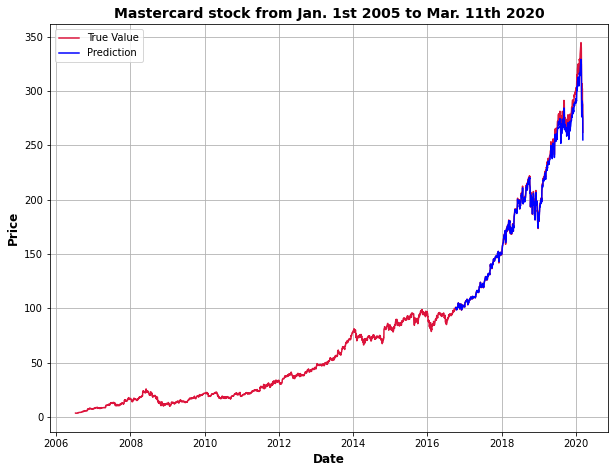

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_SVR['Y'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y'],color='b',label='Prediction')
plt.title('Mastercard stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

16.483650864008812

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.864662
dtype: float64

#### Using the model trained on Apple data

In [ ]:
SVR_Fore

SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# make predictions
testPredict = SVR_Fore.predict(testX)
#testPerdict= model.

In [ ]:
testPredict=testPredict.reshape(-1,1)
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
MAST_SVR.reset_index(inplace=True)
MAST_SVR['Date'] = pd.to_datetime(MAST_SVR['Date'])
MAST_SVR.insert (1, 'Y_1', Y_n)
MAST_SVR.set_index('Date',inplace=True)

In [ ]:
MAST_predict=pd.DataFrame(MAST_SVR.tail(len(testPredict_n)))
MAST_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
MAST_predict.insert (1, 'Y_1', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

In [ ]:
MAST_SVR.head()

,Y_1,Y,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-07-10,3.462678,3.462678,3.490458,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.730,7029000.0,3.603828,4.765,4.800,4.660,4.800,25964000.0,3.603828,4.695,4.809,4.695,4.80,14470000.0,3.525746,...,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0,3.373335,4.630,4.674,4.411,4.493,103044000.0,3.453669,4.030,4.605,4.020,4.600,395343000.0
2006-07-11,3.490458,3.490458,3.479947,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.730,7029000.0,3.603828,4.765,4.800,4.660,4.80,25964000.0,3.603828,...,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0,3.373335,4.630,4.674,4.411,4.493,103044000.0
2006-07-12,3.479947,3.479947,3.419883,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.760,13266000.0,3.551273,4.790,4.800,4.681,4.73,7029000.0,3.603828,...,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0,3.303510,4.497,4.498,4.285,4.400,49898000.0
2006-07-13,3.419884,3.419884,3.357568,3.419883,4.640,4.640,4.554,4.555,7672000.0,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.680,8097000.0,3.573797,4.740,4.784,4.671,4.76,13266000.0,3.551273,...,4.772,4.550,4.772,34439000.0,3.573797,4.833,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0,3.374085,4.435,4.536,4.435,4.494,30002000.0
2006-07-14,3.357568,3.357568,3.299755,3.357568,4.518,4.518,4.430,4.472,16625000.0,3.419883,4.640,4.640,4.554,4.555,7672000.0,3.479947,4.649,4.649,4.530,4.635,8079000.0,3.490458,4.620,4.657,4.612,4.649,4978000.0,3.462678,4.675,4.685,4.575,4.612,8380000.0,3.513731,4.725,4.735,4.679,4.68,8097000.0,3.573797,...,4.880,4.768,4.778,13372000.0,3.582807,4.760,4.772,4.550,4.772,34439000.0,3.573797,4.833,4.840,4.675,4.760,25013000.0,3.626353,4.998,5.063,4.780,4.830,49045000.0,3.690171,4.705,4.925,4.700,4.915,37188000.0,3.527998,4.850,4.870,4.679,4.699,37253000.0,3.567040,4.493,4.810,4.490,4.751,62344000.0


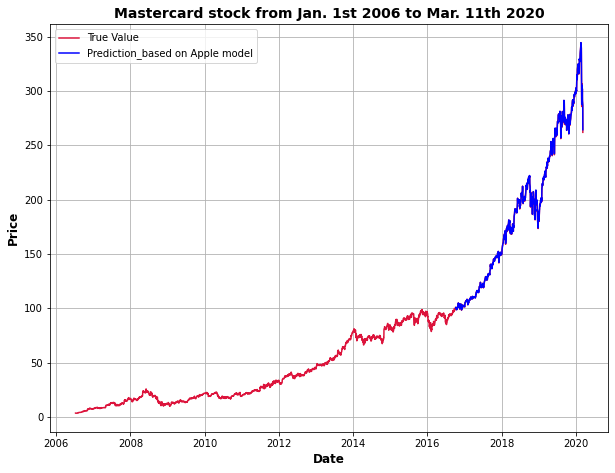

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_SVR['Y_1'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('Mastercard stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.10581152008365244

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    0.108057
dtype: float64

### FORD

In [ ]:
FORD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,15.940000,16.299999,15.760000,16.219999,9.450369,5755800
2002-01-03,16.469999,16.910000,16.350000,16.730000,9.747517,8720100
2002-01-04,17.000000,17.150000,16.770000,16.940001,9.869875,7906200
2002-01-07,17.000000,17.049999,16.469999,16.500000,9.613509,6035300
2002-01-08,16.430000,16.740000,16.400000,16.559999,9.648466,4532900


In [ ]:
FORD_SVR=FORD.copy()

In [ ]:
FORD_SVR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,15.940000,16.299999,15.760000,16.219999,9.450369,5755800
2002-01-03,16.469999,16.910000,16.350000,16.730000,9.747517,8720100
2002-01-04,17.000000,17.150000,16.770000,16.940001,9.869875,7906200
2002-01-07,17.000000,17.049999,16.469999,16.500000,9.613509,6035300
2002-01-08,16.430000,16.740000,16.400000,16.559999,9.648466,4532900


In [ ]:
memory_days=30
p_days=1
for i in range(p_days,memory_days+p_days):
  text=str(i)
  ad='Adj Close_'+text
  op='Open_'+text
  hi='High_'+text
  lo='Low_'+text
  cl='Close_'+text
  vo='Volume_'+text
  FORD_SVR[[ad,op,hi,lo,cl,vo]]=FORD_SVR[['Adj Close','Open','High','Low','Close','Volume']].shift(i);

In [ ]:
FORD_SVR.dropna(axis=0, inplace=True)

In [ ]:
FORD_SVR.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

In [ ]:
FORD_SVR.tail()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,7.08,6.97,7.29,7.34,6.89,6.97,97457800.0,7.20,7.11,7.23,6.88,7.20,96766000.0,6.96,6.84,6.96,6.67,6.96,116546700.0,6.97,7.13,7.28,6.92,6.97,118642400.0,7.21,7.30,7.46,7.21,7.21,92469500.0,7.23,7.68,7.68,7.22,7.23,108888300.0,7.57,7.70,7.72,...,8.96,8.84,8.86,59057400.0,8.820001,8.94,9.00,8.86,8.97,85163400.0,8.741339,8.88,8.96,8.78,8.89,60769300.0,8.849499,9.11,9.12,8.96,9.00,68100900.0,8.987158,9.14,9.16,8.93,9.14,75848700.0,9.006823,9.22,9.25,9.15,9.16,39914800.0,9.055987,9.15,9.22,9.10,9.21,49556400.0
2020-03-05,6.74,7.08,7.09,7.09,6.92,7.08,70588100.0,6.97,7.29,7.34,6.89,6.97,97457800.0,7.20,7.11,7.23,6.88,7.20,96766000.0,6.96,6.84,6.96,6.67,6.96,116546700.0,6.97,7.13,7.28,6.92,6.97,118642400.0,7.21,7.30,7.46,7.21,7.21,92469500.0,7.23,7.68,7.68,...,8.84,8.73,8.84,42827800.0,8.860000,8.85,8.96,8.84,8.86,59057400.0,8.820001,8.94,9.00,8.86,8.97,85163400.0,8.741339,8.88,8.96,8.78,8.89,60769300.0,8.849499,9.11,9.12,8.96,9.00,68100900.0,8.987158,9.14,9.16,8.93,9.14,75848700.0,9.006823,9.22,9.25,9.15,9.16,39914800.0
2020-03-06,6.49,6.74,6.96,6.97,6.71,6.74,78070900.0,7.08,7.09,7.09,6.92,7.08,70588100.0,6.97,7.29,7.34,6.89,6.97,97457800.0,7.20,7.11,7.23,6.88,7.20,96766000.0,6.96,6.84,6.96,6.67,6.96,116546700.0,6.97,7.13,7.28,6.92,6.97,118642400.0,7.21,7.30,7.46,...,8.84,8.74,8.82,59813700.0,8.840000,8.81,8.84,8.73,8.84,42827800.0,8.860000,8.85,8.96,8.84,8.86,59057400.0,8.820001,8.94,9.00,8.86,8.97,85163400.0,8.741339,8.88,8.96,8.78,8.89,60769300.0,8.849499,9.11,9.12,8.96,9.00,68100900.0,8.987158,9.14,9.16,8.93,9.14,75848700.0
2020-03-09,5.90,6.49,6.60,6.68,6.40,6.49,109932200.0,6.74,6.96,6.97,6.71,6.74,78070900.0,7.08,7.09,7.09,6.92,7.08,70588100.0,6.97,7.29,7.34,6.89,6.97,97457800.0,7.20,7.11,7.23,6.88,7.20,96766000.0,6.96,6.84,6.96,6.67,6.96,116546700.0,6.97,7.13,7.28,...,9.14,8.85,8.98,71432700.0,8.820000,8.78,8.84,8.74,8.82,59813700.0,8.840000,8.81,8.84,8.73,8.84,42827800.0,8.860000,8.85,8.96,8.84,8.86,59057400.0,8.820001,8.94,9.00,8.86,8.97,85163400.0,8.741339,8.88,8.96,8.78,8.89,60769300.0,8.849499,9.11,9.12,8.96,9.00,68100900.0
2020-03-10,6.26,5.90,5.97,6.14,5.87,5.90,103901700.0,6.49,6.60,6.68,6.40,6.49,109932200.0,6.74,6.96,6.97,6.71,6.74,78070900.0,7.08,7.09,7.09,6.92,7.08,70588100.0,6.97,7.29,7.34,6.89,6.97,97457800.0,7.20,7.11,7.23,6.88,7.20,96766000.0,6.96,6.84,6.96,...,9.24,9.07,9.18,86196400.0,8.980000,8.85,9.14,8.85,8.98,71432700.0,8.820000,8.78,8.84,8.74,8.82,59813700.0,8.840000,8.81,8.84,8.73,8.84,42827800.0,8.860000,8.85,8.96,8.84,8.86,59057400.0,8.820001,8.94,9.00,8.86,8.97,85163400.0,8.741339,8.88,8.96,8.78,8.89,60769300.0


In [ ]:
dataset = FORD_SVR.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4548, 180)

In [ ]:
Y.shape

(4548,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

In [ ]:
# split into train and test sets
train_size = int(len(X) * 0.75)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(X),:]
print(len(X))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4548
3411 1137
3411 1137


#### Training on Ford historical data


In [ ]:
SVR_FORD = SVR(kernel= 'rbf', C= 1, gamma= 0.1,epsilon=0.1) 
my_parameters={'C':[500 ,1000,2000],'epsilon':[ 0.001, 0.1, 0.5],'gamma':[ 0.001, 0.1, 0.5]}
#del SVR_Fore

In [ ]:
clf=GridSearchCV(estimator=SVR_FORD, param_grid= my_parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
clf.fit(trainX, trainY)
bp_rf=clf.best_params_
print(bp_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 2000, 'epsilon': 0.001, 'gamma': 0.001}


In [ ]:
SVR_FORD = SVR(kernel= 'rbf', C= 2000, gamma= 0.001,epsilon=0.001) 
SVR_FORD.fit(trainX, trainY) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict=SVR_FORD.predict(testX)
predict1=SVR_FORD.predict(trainX)

In [ ]:
# make predictions
testPredict = SVR_FORD.predict(testX)

In [ ]:
testX.shape

(1137, 180)

In [ ]:
testPredict=testPredict.reshape(-1,1)

In [ ]:
testPredict.shape

(1137, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
FORD_SVR.head()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,8.623791,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,14.05,14.63,13.90,14.53,17728700.0,8.271799,14.10,14.40,14.05,14.10,13747200.0,8.236597,14.55,14.69,...,15.90,15.10,15.29,14260600.0,9.502807,16.50,16.83,16.299999,16.309999,7033600.0,9.648466,16.43,16.74,16.400000,16.559999,4532900.0,9.613509,17.00,17.049999,16.469999,16.500000,6035300.0,9.869875,17.00,17.150000,16.770000,16.940001,7906200.0,9.747517,16.469999,16.910000,16.350000,16.730000,8720100.0,9.450369,15.940000,16.299999,15.760000,16.219999,5755800.0
2002-02-15,8.576860,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,14.05,14.63,13.90,14.53,17728700.0,8.271799,14.10,14.40,...,15.75,14.90,15.50,20725100.0,8.908520,15.85,15.90,15.100000,15.290000,14260600.0,9.502807,16.50,16.83,16.299999,16.309999,7033600.0,9.648466,16.43,16.740000,16.400000,16.559999,4532900.0,9.613509,17.00,17.049999,16.469999,16.500000,6035300.0,9.869875,17.000000,17.150000,16.770000,16.940001,7906200.0,9.747517,16.469999,16.910000,16.350000,16.730000,8720100.0
2002-02-19,8.377398,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,14.05,14.63,...,15.50,15.15,15.35,7188300.0,9.030871,14.90,15.75,14.900000,15.500000,20725100.0,8.908520,15.85,15.90,15.100000,15.290000,14260600.0,9.502807,16.50,16.830000,16.299999,16.309999,7033600.0,9.648466,16.43,16.740000,16.400000,16.559999,4532900.0,9.613509,17.000000,17.049999,16.469999,16.500000,6035300.0,9.869875,17.000000,17.150000,16.770000,16.940001,7906200.0
2002-02-20,8.506461,8.377398,14.29,14.62,14.25,14.28,7306200.0,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,...,15.59,14.91,15.04,9463000.0,8.943478,15.50,15.50,15.150000,15.350000,7188300.0,9.030871,14.90,15.75,14.900000,15.500000,20725100.0,8.908520,15.85,15.900000,15.100000,15.290000,14260600.0,9.502807,16.50,16.830000,16.299999,16.309999,7033600.0,9.648466,16.430000,16.740000,16.400000,16.559999,4532900.0,9.613509,17.000000,17.049999,16.469999,16.500000,6035300.0
2002-02-21,8.606191,8.506461,14.38,14.68,14.31,14.50,7216700.0,8.377398,14.29,14.62,14.25,14.28,7306200.0,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,...,15.30,14.85,14.96,7703100.0,8.762860,15.20,15.59,14.910000,15.040000,9463000.0,8.943478,15.50,15.50,15.150000,15.350000,7188300.0,9.030871,14.90,15.750000,14.900000,15.500000,20725100.0,8.908520,15.85,15.900000,15.100000,15.290000,14260600.0,9.502807,16.5000

In [ ]:
FORD_SVR.reset_index(inplace=True)
FORD_SVR['Date'] = pd.to_datetime(FORD_SVR['Date'])
FORD_SVR.insert (1, 'Y', Y_n)
FORD_SVR.set_index('Date',inplace=True)

In [ ]:
FORD_predict=pd.DataFrame(FORD_SVR.tail(len(testPredict_n)))
FORD_predict.drop('Y',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
FORD_predict.insert (1, 'Y', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

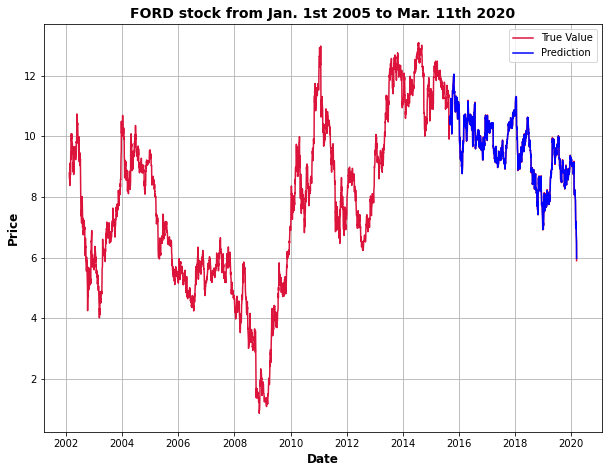

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_SVR['Y'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y'],color='b',label='Prediction')
plt.title('FORD stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.00015182818629925644

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.09673
dtype: float64

#### Using the model trained on Apple data

In [ ]:
SVR_Fore

SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# make predictions
testPredict = SVR_Fore.predict(testX)
#testPerdict= model.

In [ ]:
testPredict=testPredict.reshape(-1,1)
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
FORD_SVR.reset_index(inplace=True)
FORD_SVR['Date'] = pd.to_datetime(FORD_SVR['Date'])
FORD_SVR.insert (1, 'Y_1', Y_n)
FORD_SVR.set_index('Date',inplace=True)

In [ ]:
FORD_predict=pd.DataFrame(FORD_SVR.tail(len(testPredict_n)))
FORD_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
FORD_predict.insert (1, 'Y_1', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

In [ ]:
FORD_SVR.head()

,Y_1,Y,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,8.793921,8.793921,8.623791,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,14.05,14.63,13.90,14.53,17728700.0,8.271799,14.10,14.40,14.05,14.10,13747200.0,8.236597,...,15.90,15.10,15.29,14260600.0,9.502807,16.50,16.83,16.299999,16.309999,7033600.0,9.648466,16.43,16.74,16.400000,16.559999,4532900.0,9.613509,17.00,17.049999,16.469999,16.500000,6035300.0,9.869875,17.00,17.150000,16.770000,16.940001,7906200.0,9.747517,16.469999,16.910000,16.350000,16.730000,8720100.0,9.450369,15.940000,16.299999,15.760000,16.219999,5755800.0
2002-02-15,8.623791,8.623791,8.576860,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,14.05,14.63,13.90,14.53,17728700.0,8.271799,...,15.75,14.90,15.50,20725100.0,8.908520,15.85,15.90,15.100000,15.290000,14260600.0,9.502807,16.50,16.83,16.299999,16.309999,7033600.0,9.648466,16.43,16.740000,16.400000,16.559999,4532900.0,9.613509,17.00,17.049999,16.469999,16.500000,6035300.0,9.869875,17.000000,17.150000,16.770000,16.940001,7906200.0,9.747517,16.469999,16.910000,16.350000,16.730000,8720100.0
2002-02-19,8.576860,8.576860,8.377398,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,14.52,14.60,14.13,14.38,6364400.0,8.524059,...,15.50,15.15,15.35,7188300.0,9.030871,14.90,15.75,14.900000,15.500000,20725100.0,8.908520,15.85,15.90,15.100000,15.290000,14260600.0,9.502807,16.50,16.830000,16.299999,16.309999,7033600.0,9.648466,16.43,16.740000,16.400000,16.559999,4532900.0,9.613509,17.000000,17.049999,16.469999,16.500000,6035300.0,9.869875,17.000000,17.150000,16.770000,16.940001,7906200.0
2002-02-20,8.377398,8.377398,8.506461,8.377398,14.29,14.62,14.25,14.28,7306200.0,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,14.28,14.45,14.16,14.30,7975900.0,8.436062,...,15.59,14.91,15.04,9463000.0,8.943478,15.50,15.50,15.150000,15.350000,7188300.0,9.030871,14.90,15.75,14.900000,15.500000,20725100.0,8.908520,15.85,15.900000,15.100000,15.290000,14260600.0,9.502807,16.50,16.830000,16.299999,16.309999,7033600.0,9.648466,16.430000,16.740000,16.400000,16.559999,4532900.0,9.613509,17.000000,17.049999,16.469999,16.500000,6035300.0
2002-02-21,8.506461,8.506461,8.606191,8.506461,14.38,14.68,14.31,14.50,7216700.0,8.377398,14.29,14.62,14.25,14.28,7306200.0,8.576860,14.62,14.70,14.40,14.62,4281300.0,8.623791,15.10,15.10,14.65,14.70,7825800.0,8.793921,14.72,15.03,14.57,14.99,8080300.0,8.412598,14.22,14.40,14.22,14.34,5553100.0,8.389131,...,15.30,14.85,14.96,7703100.0,8.762860,15.20,15.59,14.910000,15.040000,9463000.0,8.943478,15.50,15.50,15.150000,15.350000,7188300.0,9.030871,14.90,15.750000,14.900000,15.500000,20725100.0,8.908520,15.85,15.900000,15.100000,15.290000,14260

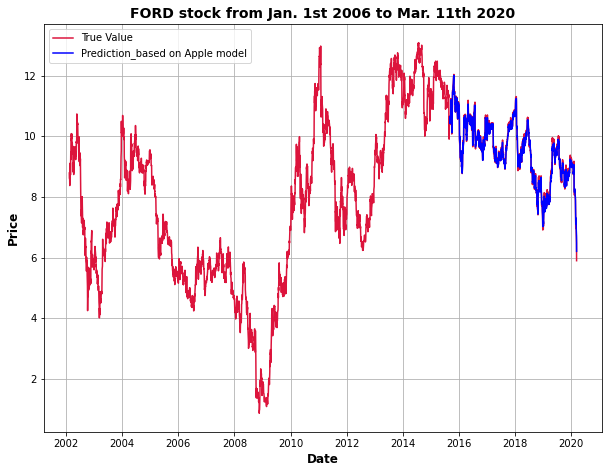

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_SVR['Y_1'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('FORD stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.0039469057861757275

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    0.512815
dtype: float64

### EXON

In [ ]:
EXON.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,39.299999,39.599998,38.900002,39.599998,23.732252,11261900
2002-01-03,39.849998,39.980000,39.410000,39.660000,23.768194,10128200
2002-01-04,39.700001,40.070000,39.599998,40.000000,23.971949,8052100
2002-01-07,39.750000,40.090000,39.490002,39.650002,23.762201,9945700
2002-01-08,39.900002,39.990002,39.500000,39.700001,23.792166,8278000


In [ ]:
EXON_SVR=EXON.copy()

In [ ]:
EXON_SVR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,39.299999,39.599998,38.900002,39.599998,23.732252,11261900
2002-01-03,39.849998,39.980000,39.410000,39.660000,23.768194,10128200
2002-01-04,39.700001,40.070000,39.599998,40.000000,23.971949,8052100
2002-01-07,39.750000,40.090000,39.490002,39.650002,23.762201,9945700
2002-01-08,39.900002,39.990002,39.500000,39.700001,23.792166,8278000


In [ ]:
memory_days=30
p_days=1
for i in range(p_days,memory_days+p_days):
  text=str(i)
  ad='Adj Close_'+text
  op='Open_'+text
  hi='High_'+text
  lo='Low_'+text
  cl='Close_'+text
  vo='Volume_'+text
  EXON_SVR[[ad,op,hi,lo,cl,vo]]=EXON_SVR[['Adj Close','Open','High','Low','Close','Volume']].shift(i);

In [ ]:
EXON_SVR.dropna(axis=0, inplace=True)

In [ ]:
EXON_SVR.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

In [ ]:
EXON_SVR.tail()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,52.419998,51.299999,53.950001,54.150002,50.980000,51.299999,50580700.0,53.880001,52.590000,53.889999,51.130001,53.880001,38127600.0,51.439999,48.770000,51.439999,48.009998,51.439999,62468400.0,49.820000,51.709999,52.439999,49.799999,49.820000,48141300.0,53.009998,54.549999,54.820000,52.930000,53.009998,29801000.0,54.200001,56.750000,56.750000,53.970001,54.200001,36414500.0,56.360001,57.619999,57.799999,...,65.129997,63.900002,64.110001,14202800.0,63.734993,65.110001,65.199997,64.629997,64.650002,19664700.0,63.823715,65.419998,65.730003,64.699997,64.739998,21231000.0,65.381355,66.540001,66.680000,66.040001,66.320000,18238600.0,65.824982,66.709999,66.930000,66.050003,66.769997,19605900.0,66.239044,67.559998,67.699997,67.000000,67.190002,17033100.0,66.623528,68.379997,68.419998,67.510002,67.580002,17982600.0
2020-03-05,50.110001,52.419998,52.230000,52.480000,51.119999,52.419998,24079600.0,51.299999,53.950001,54.150002,50.980000,51.299999,50580700.0,53.880001,52.590000,53.889999,51.130001,53.880001,38127600.0,51.439999,48.770000,51.439999,48.009998,51.439999,62468400.0,49.820000,51.709999,52.439999,49.799999,49.820000,48141300.0,53.009998,54.549999,54.820000,52.930000,53.009998,29801000.0,54.200001,56.750000,56.750000,...,64.879997,63.430000,64.790001,18544700.0,63.202637,65.029999,65.129997,63.900002,64.110001,14202800.0,63.734993,65.110001,65.199997,64.629997,64.650002,19664700.0,63.823715,65.419998,65.730003,64.699997,64.739998,21231000.0,65.381355,66.540001,66.680000,66.040001,66.320000,18238600.0,65.824982,66.709999,66.930000,66.050003,66.769997,19605900.0,66.239044,67.559998,67.699997,67.000000,67.190002,17033100.0
2020-03-06,47.689999,50.110001,50.419998,50.700001,49.040001,50.110001,40788200.0,52.419998,52.230000,52.480000,51.119999,52.419998,24079600.0,51.299999,53.950001,54.150002,50.980000,51.299999,50580700.0,53.880001,52.590000,53.889999,51.130001,53.880001,38127600.0,51.439999,48.770000,51.439999,48.009998,51.439999,62468400.0,49.820000,51.709999,52.439999,49.799999,49.820000,48141300.0,53.009998,54.549999,54.820000,...,63.200001,61.860001,62.119999,34282900.0,63.873013,63.779999,64.879997,63.430000,64.790001,18544700.0,63.202637,65.029999,65.129997,63.900002,64.110001,14202800.0,63.734993,65.110001,65.199997,64.629997,64.650002,19664700.0,63.823715,65.419998,65.730003,64.699997,64.739998,21231000.0,65.381355,66.540001,66.680000,66.040001,66.320000,18238600.0,65.824982,66.709999,66.930000,66.050003,66.769997,19605900.0
2020-03-09,41.860001,47.689999,48.840000,49.009998,47.200001,47.689999,55640500.0,50.110001,50.419998,50.700001,49.040001,50.110001,40788200.0,52.419998,52.230000,52.480000,51.119999,52.419998,24079600.0,51.299999,53.950001,54.150002,50.980000,51.299999,50580700.0,53.880001,52.590000,53.889999,51.130001,53.880001,38127600.0,51.439999,48.770000,51.439999,48.009998,51.439999,62468400.0,49.820000,51.709999,52.439999,...,61.419998,60.369999,60.730000,27397300.0,61.240799,63.200001,63.200001,61.860001,62.119999,34282900.0,63.873013,63.779999,64.879997,63.430000,64.790001,18544700.0,63.202637,65.029999,65.129997,63.900002,64.110001,14202800.0,63.734993,65.110001,65.199997,64.629997,64.650002,19664700.0,63.823715,65.419998,65.73

In [ ]:
dataset = EXON_SVR.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4548, 180)

In [ ]:
Y.shape

(4548,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

In [ ]:
# split into train and test sets
train_size = int(len(X) * 0.75)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(X),:]
print(len(X))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4548
3411 1137
3411 1137


#### Training on Exon historical data


In [ ]:
SVR_EXON = SVR(kernel= 'rbf', C= 1, gamma= 0.1,epsilon=0.1) 
my_parameters={'C':[500 ,1000,2000],'epsilon':[ 0.001, 0.1, 0.5],'gamma':[ 0.001, 0.1, 0.5]}
#del SVR_Fore

In [ ]:
clf=GridSearchCV(estimator=SVR_EXON, param_grid= my_parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
clf.fit(trainX, trainY)
bp_rf=clf.best_params_
print(bp_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 2000, 'epsilon': 0.001, 'gamma': 0.001}


In [ ]:
SVR_EXON = SVR(kernel= 'rbf', C= 2000, gamma= 0.001,epsilon=0.001) 
SVR_EXON.fit(trainX, trainY) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict=SVR_EXON.predict(testX)
predict1=SVR_EXON.predict(trainX)

In [ ]:
# make predictions
testPredict = SVR_EXON.predict(testX)

In [ ]:
testX.shape

(1137, 180)

In [ ]:
testPredict=testPredict.reshape(-1,1)

In [ ]:
testPredict.shape

(1137, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
EXON_SVR.head()

,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,Open_7,High_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,23.511599,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,38.689999,38.990002,38.209999,38.299999,9027100.0,23.324713,38.340000,38.980000,38.130001,38.919998,10385500.0,22.971125,38.599998,38.900002,...,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0,23.768194,39.849998,39.980000,39.410000,39.660000,10128200.0,23.732252,39.299999,39.599998,38.900002,39.599998,11261900.0
2002-02-15,23.451313,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,38.689999,38.990002,38.209999,38.299999,9027100.0,23.324713,38.340000,38.980000,...,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0,23.768194,39.849998,39.980000,39.410000,39.660000,10128200.0
2002-02-19,23.372946,23.451313,39.180000,39.400002,38.900002,38.900002,10471300.0,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,38.689999,38.990002,...,39.200001,38.500000,38.639999,10142900.0,23.073006,39.389999,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0
2002-02-20,23.505571,23.372946,38.900002,39.439999,38.720001,38.770000,9863600.0,23.451313,39.180000,39.400002,38.900002,38.900002,10471300.0,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,...,39.549999,38.880001,39.299999,9488500.0,23.156916,38.599998,39.200001,38.500000,38.639999,10142900.0,23.073006,39.389999,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,827800

In [ ]:
EXON_SVR.reset_index(inplace=True)
EXON_SVR['Date'] = pd.to_datetime(EXON_SVR['Date'])
EXON_SVR.insert (1, 'Y', Y_n)
EXON_SVR.set_index('Date',inplace=True)

In [ ]:
EXON_predict=pd.DataFrame(EXON_SVR.tail(len(testPredict_n)))
EXON_predict.drop('Y',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
EXON_predict.insert (1, 'Y', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

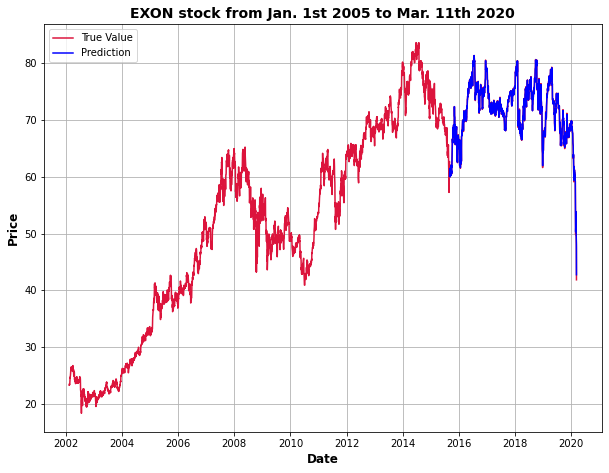

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_SVR['Y'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y'],color='b',label='Prediction')
plt.title('EXON stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.007126489304224864

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.085055
dtype: float64

#### Using the model trained on Apple data

In [ ]:
SVR_Fore

SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# make predictions
testPredict = SVR_Fore.predict(testX)
#testPerdict= model.

In [ ]:
testPredict=testPredict.reshape(-1,1)
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
EXON_SVR.reset_index(inplace=True)
EXON_SVR['Date'] = pd.to_datetime(EXON_SVR['Date'])
EXON_SVR.insert (1, 'Y_1', Y_n)
EXON_SVR.set_index('Date',inplace=True)

In [ ]:
EXON_predict=pd.DataFrame(EXON_SVR.tail(len(testPredict_n)))
EXON_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
EXON_predict.insert (1, 'Y_1', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

In [ ]:
EXON_SVR.head()

,Y_1,Y,Adj Close,Adj Close_1,Open_1,High_1,Low_1,Close_1,Volume_1,Adj Close_2,Open_2,High_2,Low_2,Close_2,Volume_2,Adj Close_3,Open_3,High_3,Low_3,Close_3,Volume_3,Adj Close_4,Open_4,High_4,Low_4,Close_4,Volume_4,Adj Close_5,Open_5,High_5,Low_5,Close_5,Volume_5,Adj Close_6,Open_6,High_6,Low_6,Close_6,Volume_6,Adj Close_7,...,High_24,Low_24,Close_24,Volume_24,Adj Close_25,Open_25,High_25,Low_25,Close_25,Volume_25,Adj Close_26,Open_26,High_26,Low_26,Close_26,Volume_26,Adj Close_27,Open_27,High_27,Low_27,Close_27,Volume_27,Adj Close_28,Open_28,High_28,Low_28,Close_28,Volume_28,Adj Close_29,Open_29,High_29,Low_29,Close_29,Volume_29,Adj Close_30,Open_30,High_30,Low_30,Close_30,Volume_30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-14,23.294573,23.294573,23.511599,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,38.689999,38.990002,38.209999,38.299999,9027100.0,23.324713,38.340000,38.980000,38.130001,38.919998,10385500.0,22.971125,...,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0,23.768194,39.849998,39.980000,39.410000,39.660000,10128200.0,23.732252,39.299999,39.599998,38.900002,39.599998,11261900.0
2002-02-15,23.511599,23.511599,23.451313,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,38.689999,38.990002,38.209999,38.299999,9027100.0,23.324713,...,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0,23.768194,39.849998,39.980000,39.410000,39.660000,10128200.0
2002-02-19,23.451313,23.451313,23.372946,23.451313,39.180000,39.400002,38.900002,38.900002,10471300.0,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,38.049999,38.360001,37.990002,38.290001,8731100.0,23.089600,...,39.200001,38.500000,38.639999,10142900.0,23.073006,39.389999,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.762201,39.750000,40.090000,39.490002,39.650002,9945700.0,23.971949,39.700001,40.070000,39.599998,40.000000,8052100.0
2002-02-20,23.372946,23.372946,23.505571,23.372946,38.900002,39.439999,38.720001,38.770000,9863600.0,23.451313,39.180000,39.400002,38.900002,38.900002,10471300.0,23.511599,38.980000,39.400002,38.669998,39.000000,10044600.0,23.294573,38.500000,38.669998,38.119999,38.639999,10065900.0,23.149891,38.680000,38.740002,37.599998,38.400002,7334000.0,23.210171,38.290001,38.910000,37.959999,38.500000,8757900.0,23.083578,...,39.549999,38.880001,39.299999,9488500.0,23.156916,38.599998,39.200001,38.500000,38.639999,10142900.0,23.073006,39.389999,39.599998,38.450001,38.500000,9459000.0,23.606386,39.240002,39.770000,39.060001,39.389999,7847500.0,23.516485,39.599998,39.970001,39.099998,39.240002,10036700.0,23.792166,39.900002,39.990002,39.500000,39.700001,8278000.0,23.7

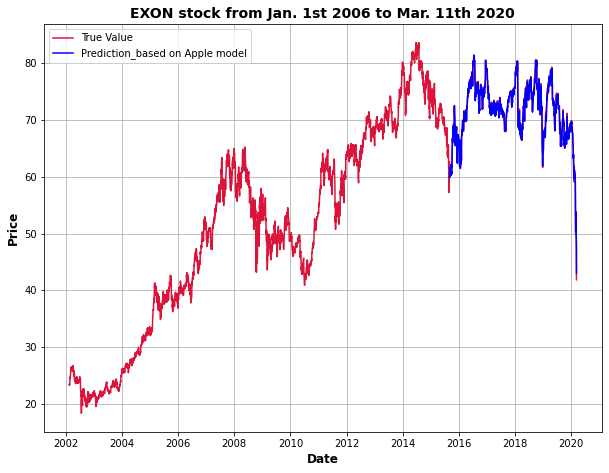

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_SVR['Y_1'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('EXON stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.03941833037993947

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    0.214721
dtype: float64

## CNN-LSTM for stock price


### APPLE

In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,1.575000,1.664286,1.568571,1.664286,1.444668,132374200
2002-01-03,1.642857,1.696429,1.626429,1.684286,1.462029,153001800
2002-01-04,1.667143,1.710714,1.642143,1.692143,1.468849,102494000
2002-01-07,1.694286,1.714286,1.625000,1.635714,1.419867,111146000
2002-01-08,1.625000,1.646429,1.604286,1.615000,1.401886,112509600


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
AAPL_cl = AAPL[['Adj Close', 'Open','High','Low','Close','Volume']]
AAPL_cl.head();

Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
memory_days=120 #Setting memory days for SVR look back (Number of predictors)
p_days=1 #Prediction days
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  AAPL_cl[op]=AAPL_cl['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


drop the unnecceray columns.

In [ ]:
AAPL_cl.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
AAPL_cl.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
AAPL_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,1.486830,1.504811,...,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029,1.444668
2002-06-26,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,1.486830,...,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029
2002-06-27,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,...,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849
2002-06-28,1.098692,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,...,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1

In [ ]:
dataset = AAPL_cl.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4458, 120)

In [ ]:
Y.shape

(4458,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

test and train separation:

#### Train on 75% of apple dataset

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4458
3343 1115
3343 1115


In [ ]:
testX.shape

(1115, 120)

In [ ]:
trainY.shape

(3343, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0],  1,testX.shape[1]))

In [ ]:
trainX.shape

(3343, 1, 120)

In [ ]:
cnnlstm_A = Sequential()
# define CNN model
input_layer = Input(shape=(1, 120))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
#lstm2 = LSTM(16, return_sequences=True)(lstm1)
#dense1 = Dense(16, activation='sigmoid')(lstm2)
output_layer = Dense(1)(lstm1)
cnnlstm_A = Model(inputs=input_layer, outputs=output_layer)
adam=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
cnnlstm_A.compile(loss='mean_squared_error', optimizer=adam)
#cnnlstm.summary()

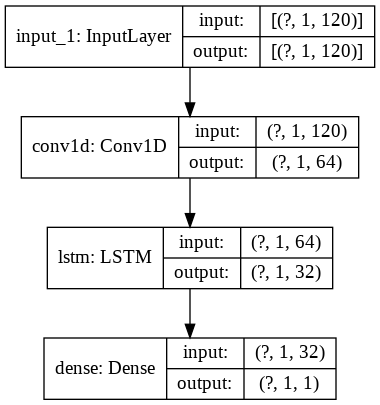

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(cnnlstm_A, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

In [ ]:
cnnlstm_A.fit(trainX, trainY, validation_split=0.33, epochs=2000, batch_size=256, verbose=2);

Epoch 1/2000
9/9 - 0s - loss: 0.0026 - val_loss: 0.0535
Epoch 2/2000
9/9 - 0s - loss: 0.0018 - val_loss: 0.0388
Epoch 3/2000
9/9 - 0s - loss: 0.0013 - val_loss: 0.0280
Epoch 4/2000
9/9 - 0s - loss: 8.3780e-04 - val_loss: 0.0194
Epoch 5/2000
9/9 - 0s - loss: 5.4265e-04 - val_loss: 0.0125
Epoch 6/2000
9/9 - 0s - loss: 3.4320e-04 - val_loss: 0.0077
Epoch 7/2000
9/9 - 0s - loss: 2.3350e-04 - val_loss: 0.0044
Epoch 8/2000
9/9 - 0s - loss: 1.7808e-04 - val_loss: 0.0026
Epoch 9/2000
9/9 - 0s - loss: 1.4980e-04 - val_loss: 0.0017
Epoch 10/2000
9/9 - 0s - loss: 1.3075e-04 - val_loss: 0.0013
Epoch 11/2000
9/9 - 0s - loss: 1.1438e-04 - val_loss: 0.0010
Epoch 12/2000
9/9 - 0s - loss: 9.8933e-05 - val_loss: 9.3104e-04
Epoch 13/2000
9/9 - 0s - loss: 8.5335e-05 - val_loss: 8.4116e-04
Epoch 14/2000
9/9 - 0s - loss: 7.4193e-05 - val_loss: 7.5462e-04
Epoch 15/2000
9/9 - 0s - loss: 6.5492e-05 - val_loss: 6.8424e-04
Epoch 16/2000
9/9 - 0s - loss: 5.7864e-05 - val_loss: 6.4580e-04
Epoch 17/2000
9/9 - 0s - 

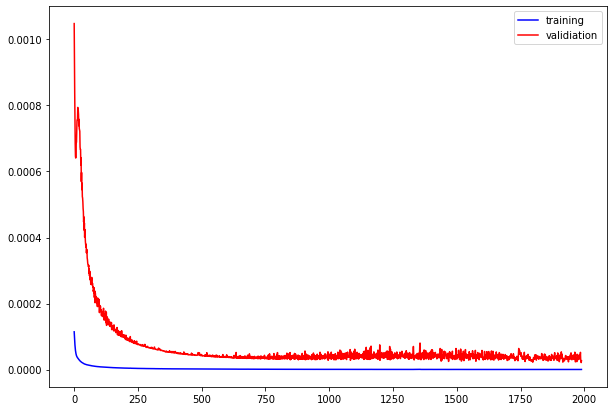

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnlstm_A.history.history['loss'][10:],'b',label='training')
plt.plot(cnnlstm_A.history.history['val_loss'][10:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = cnnlstm_A.predict(testX)

In [ ]:
testX.shape

(1115, 1, 120)

In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1115, 1)


(1115, 120)

In [ ]:
testPredict.shape

(1115, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,1.486830,1.504811,...,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029,1.444668
2002-06-26,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,1.486830,...,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029
2002-06-27,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,...,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849
2002-06-28,1.098692,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,...,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1

In [ ]:
AAPL_cl.reset_index(inplace=True)
AAPL_cl['Date'] = pd.to_datetime(AAPL_cl['Date'])
AAPL_cl.insert (1, 'Y', Y_n)
AAPL_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
AAPL_predict=pd.DataFrame(AAPL_cl.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

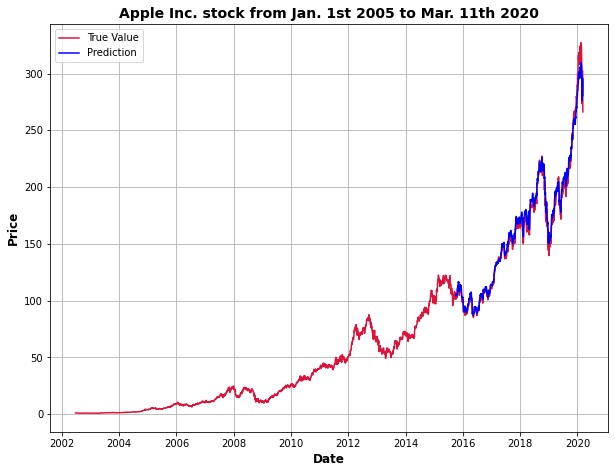

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_cl['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

23.72498

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    2.186693
dtype: float32

#### Train on the entire apple dataset

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.99)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4458
4413 45
4413 45


In [ ]:
testX.shape

(45, 120)

In [ ]:
trainY.shape

(4413, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0],  1,testX.shape[1]))

In [ ]:
trainX.shape

(4413, 1, 120)

In [ ]:
cnnlstm = Sequential()
# define CNN model
input_layer = Input(shape=(1, 120))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
#lstm2 = LSTM(16, return_sequences=True)(lstm1)
#dense1 = Dense(16, activation='sigmoid')(lstm2)
output_layer = Dense(1)(lstm1)
cnnlstm = Model(inputs=input_layer, outputs=output_layer)
adam=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
cnnlstm.compile(loss='mean_squared_error', optimizer=adam)
#cnnlstm.summary()

In [ ]:
cnnlstm.fit(trainX, trainY, validation_split=0.33, epochs=2000, batch_size=256, verbose=2);

Epoch 1/2000
12/12 - 1s - loss: 0.0095 - val_loss: 0.1611
Epoch 2/2000
12/12 - 0s - loss: 0.0062 - val_loss: 0.1089
Epoch 3/2000
12/12 - 0s - loss: 0.0037 - val_loss: 0.0667
Epoch 4/2000
12/12 - 0s - loss: 0.0018 - val_loss: 0.0362
Epoch 5/2000
12/12 - 0s - loss: 7.7351e-04 - val_loss: 0.0170
Epoch 6/2000
12/12 - 0s - loss: 3.5704e-04 - val_loss: 0.0085
Epoch 7/2000
12/12 - 0s - loss: 2.8383e-04 - val_loss: 0.0066
Epoch 8/2000
12/12 - 0s - loss: 2.6209e-04 - val_loss: 0.0064
Epoch 9/2000
12/12 - 0s - loss: 2.3954e-04 - val_loss: 0.0056
Epoch 10/2000
12/12 - 0s - loss: 2.1618e-04 - val_loss: 0.0054
Epoch 11/2000
12/12 - 0s - loss: 1.9563e-04 - val_loss: 0.0052
Epoch 12/2000
12/12 - 0s - loss: 1.8167e-04 - val_loss: 0.0048
Epoch 13/2000
12/12 - 0s - loss: 1.6476e-04 - val_loss: 0.0045
Epoch 14/2000
12/12 - 0s - loss: 1.5325e-04 - val_loss: 0.0043
Epoch 15/2000
12/12 - 0s - loss: 1.4364e-04 - val_loss: 0.0039
Epoch 16/2000
12/12 - 0s - loss: 1.3293e-04 - val_loss: 0.0038
Epoch 17/2000
12/

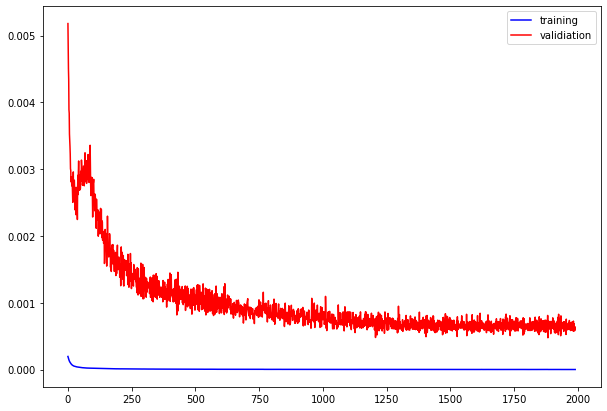

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnlstm.history.history['loss'][10:],'b',label='training')
plt.plot(cnnlstm.history.history['val_loss'][10:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = cnnlstm.predict(testX)

In [ ]:
testX.shape

(45, 1, 120)

In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(45, 1)


(45, 120)

In [ ]:
testPredict.shape

(45, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
AAPL_cl.head()

,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,1.070790,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,1.486830,...,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029,1.444668
2002-06-26,1.062730,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,1.468849,...,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849,1.462029
2002-06-27,1.026148,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,1.457689,...,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.288421,1.345463,1.311362,1.305162,1.316322,1.342363,1.401886,1.419867,1.468849
2002-06-28,1.057770,1.098692,1.057770,1.026148,1.062730,1.070790,1.044749,1.060870,1.061490,1.249358,1.273540,1.246258,1.211537,1.245639,1.268580,1.331823,1.326863,1.373985,1.408706,1.412426,1.420487,1.444668,1.500471,1.486830,1.486830,1.497370,1.561234,1.507911,1.454589,1.533952,1.550693,1.563093,1.567433,1.587895,1.484349,1.445908,1.499850,1.511011,1.393205,1.404366,...,1.458929,1.506051,1.453968,1.345463,1.361584,1.467609,1.476289,1.409946,1.333063,1.434128,1.402506,1.481870,1.525272,1.550693,1.532092,1.548833,1.489930,1.506671,1.529612,1.577974,1.571774,1.513491,1.532712,1.493651,1.430407,1.442808,1.441568,1.439088,1.427307,1.352904,1.374604,1.393825,1.2

In [ ]:
AAPL_cl.drop('Y',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
AAPL_cl.reset_index(inplace=True)
AAPL_cl['Date'] = pd.to_datetime(AAPL_cl['Date'])
AAPL_cl.insert (1, 'Y', Y_n)
AAPL_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
AAPL_predict=pd.DataFrame(AAPL_cl.tail(len(testPredict_n)))
AAPL_predict.drop('Y',inplace=True,axis=1)

In [ ]:
AAPL_predict.reset_index(inplace=True)
AAPL_predict['Date'] = pd.to_datetime(AAPL_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
AAPL_predict.insert (1, 'Y', testPredict_n)
AAPL_predict.set_index('Date',inplace=True)

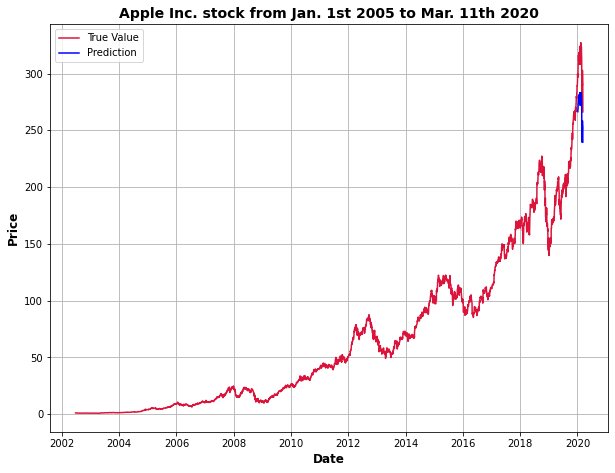

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(AAPL_cl['Y'],color='#DC143C',label='True Value')
plt.plot(AAPL_predict['Y'],color='b',label='Prediction')
plt.title('Apple Inc. stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

1412.5677

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    12.074044
dtype: float32

### Mastercard

In [ ]:
MAST.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-05-25,4.030,4.605,4.020,4.600,3.453669,395343000
2006-05-26,4.630,4.674,4.411,4.493,3.373335,103044000
2006-05-30,4.497,4.498,4.285,4.400,3.303510,49898000
2006-05-31,4.435,4.536,4.435,4.494,3.374085,30002000
2006-06-01,4.493,4.810,4.490,4.751,3.567040,62344000


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
MAST_cl = MAST[['Adj Close', 'Open','High','Low','Close','Volume']]
MAST_cl.head();

Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
memory_days=120 #Setting memory days for SVR look back (Number of predictors)
p_days=1 #Prediction days
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  MAST_cl[op]=MAST_cl['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


drop the unnecceray columns.

In [ ]:
MAST_cl.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
MAST_cl.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
MAST_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-11-14,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,5.184258,4.996558,...,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335,3.453669
2006-11-15,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,5.184258,...,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335
2006-11-16,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,...,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510
2006-11-17,7.210015,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,...,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3

In [ ]:
dataset = MAST_cl.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(3351, 120)

In [ ]:
Y.shape

(3351,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

3351
2513 838
2513 838


In [ ]:
testX.shape

(838, 120)

In [ ]:
trainY.shape

(2513, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0],  1,testX.shape[1]))

In [ ]:
trainX.shape

(2513, 1, 120)

#### Training on Mastercard historical data


In [ ]:

cnnlstm_M = Sequential()
# define CNN model
input_layer = Input(shape=(1, 120))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
#lstm2 = LSTM(16, return_sequences=True)(lstm1)
#dense1 = Dense(16, activation='sigmoid')(lstm2)
output_layer = Dense(1)(lstm1)
cnnlstm_M = Model(inputs=input_layer, outputs=output_layer)
adam=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
cnnlstm_M.compile(loss='mean_squared_error', optimizer=adam)
#cnnlstm.summary()

In [ ]:
cnnlstm_M.fit(trainX, trainY, validation_split=0.33, epochs=1200, batch_size=256, verbose=2);

Epoch 1/1200
7/7 - 0s - loss: 0.0042 - val_loss: 0.0553
Epoch 2/1200
7/7 - 0s - loss: 0.0032 - val_loss: 0.0442
Epoch 3/1200
7/7 - 0s - loss: 0.0024 - val_loss: 0.0347
Epoch 4/1200
7/7 - 0s - loss: 0.0017 - val_loss: 0.0267
Epoch 5/1200
7/7 - 0s - loss: 0.0012 - val_loss: 0.0200
Epoch 6/1200
7/7 - 0s - loss: 8.6470e-04 - val_loss: 0.0147
Epoch 7/1200
7/7 - 0s - loss: 5.9372e-04 - val_loss: 0.0106
Epoch 8/1200
7/7 - 0s - loss: 4.2138e-04 - val_loss: 0.0076
Epoch 9/1200
7/7 - 0s - loss: 3.1183e-04 - val_loss: 0.0054
Epoch 10/1200
7/7 - 0s - loss: 2.5087e-04 - val_loss: 0.0038
Epoch 11/1200
7/7 - 0s - loss: 2.2101e-04 - val_loss: 0.0028
Epoch 12/1200
7/7 - 0s - loss: 2.0534e-04 - val_loss: 0.0022
Epoch 13/1200
7/7 - 0s - loss: 1.9619e-04 - val_loss: 0.0019
Epoch 14/1200
7/7 - 0s - loss: 1.8646e-04 - val_loss: 0.0017
Epoch 15/1200
7/7 - 0s - loss: 1.7614e-04 - val_loss: 0.0016
Epoch 16/1200
7/7 - 0s - loss: 1.6404e-04 - val_loss: 0.0016
Epoch 17/1200
7/7 - 0s - loss: 1.5583e-04 - val_loss:

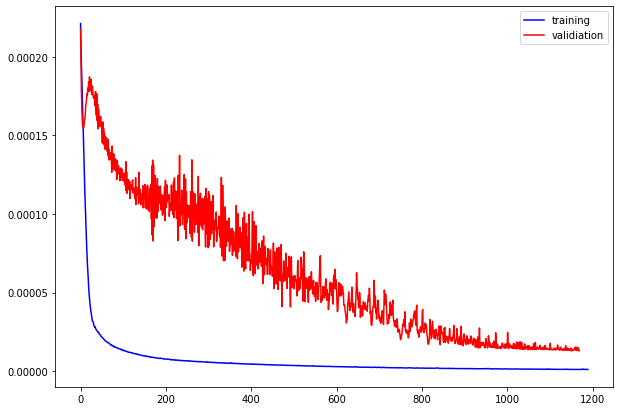

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnlstm_M.history.history['loss'][10:],'b',label='training')
plt.plot(cnnlstm_M.history.history['val_loss'][30:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = cnnlstm_M.predict(testX)

In [ ]:
testX.shape

(838, 1, 120)

In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(838, 1)


(838, 120)

In [ ]:
testPredict.shape

(838, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
MAST_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-11-14,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,5.184258,4.996558,...,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335,3.453669
2006-11-15,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,5.184258,...,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335
2006-11-16,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,...,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510
2006-11-17,7.210015,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,...,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3

In [ ]:
MAST_cl.reset_index(inplace=True)
MAST_cl['Date'] = pd.to_datetime(MAST_cl['Date'])
MAST_cl.insert (1, 'Y', Y_n)
MAST_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MAST_predict=pd.DataFrame(MAST_cl.tail(len(testPredict_n)))
MAST_predict.drop('Y',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
MAST_predict.insert (1, 'Y', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

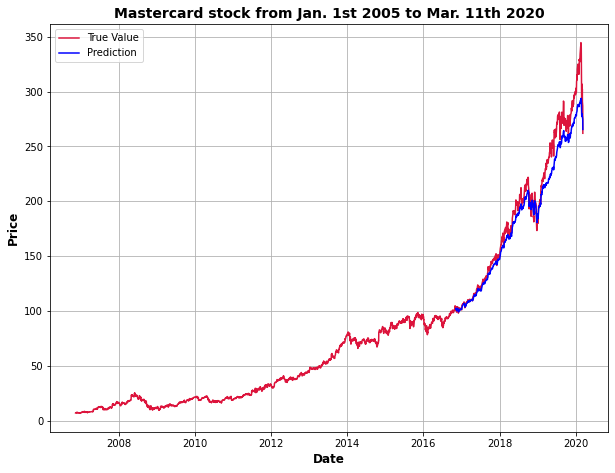

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_cl['Y'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y'],color='b',label='Prediction')
plt.title('Mastercard stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

180.10626

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    4.166125
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = cnnlstm.predict(testX)
#testPerdict= model.

(838, 1, 120)


In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(838, 1)


(838, 120)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
MAST_cl.reset_index(inplace=True)
MAST_cl['Date'] = pd.to_datetime(MAST_cl['Date'])
MAST_cl.insert (1, 'Y_1', Y_n)
MAST_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MAST_predict=pd.DataFrame(MAST_cl.tail(len(testPredict_n)))
MAST_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
MAST_predict.reset_index(inplace=True)
MAST_predict['Date'] = pd.to_datetime(MAST_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
MAST_predict.insert (1, 'Y_1', testPredict_n)
MAST_predict.set_index('Date',inplace=True)

In [ ]:
MAST_cl.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-11-14,7.343889,7.343889,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,4.950010,...,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335,3.453669
2006-11-15,7.241203,7.241203,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,4.835138,...,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510,3.373335
2006-11-16,7.248808,7.248808,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,4.955264,...,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.582807,3.573797,3.626353,3.690171,3.527998,3.567040,3.374085,3.303510
2006-11-17,7.189477,7.189477,7.210015,7.189477,7.248808,7.241203,7.343889,6.784822,6.708762,6.727018,7.035831,7.324873,6.808405,6.663126,6.470685,5.636272,5.517614,5.525220,5.491752,5.381461,5.415690,5.343429,5.417210,5.501640,5.358643,5.286382,5.423296,5.331260,5.355599,5.286382,5.469696,5.537392,5.716139,5.521415,5.227053,5.231559,5.252581,5.281861,5.154227,5.093412,...,3.504723,3.459675,3.378590,3.399612,3.419883,3.399612,3.296001,3.302760,3.299755,3.357568,3.419883,3.479947,3.490458,3.462678,3.513731,3.573797,3.551273,3.603828,3.603828,3.525746,3.552023,3.566289,3.524996,3.498718,3.401113,3.305011,3.329037,3.380091,3.449916,3.387598,3.416129,3.524996,3.587310,3.5

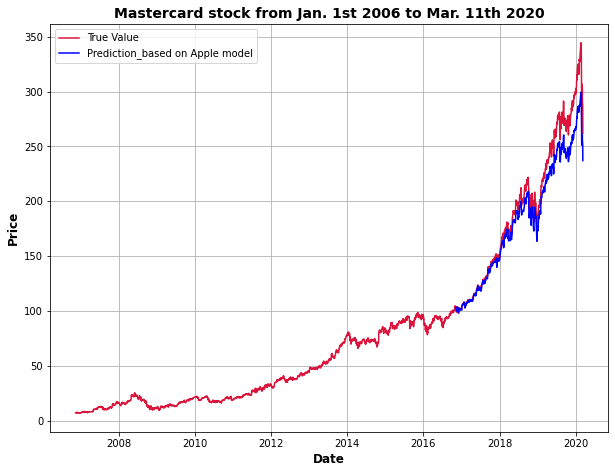

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(MAST_cl['Y_1'],color='#DC143C',label='True Value')
plt.plot(MAST_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('Mastercard stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

264.6511

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    4.778318
dtype: float32

### FORD


In [ ]:
FORD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,15.940000,16.299999,15.760000,16.219999,9.450369,5755800
2002-01-03,16.469999,16.910000,16.350000,16.730000,9.747517,8720100
2002-01-04,17.000000,17.150000,16.770000,16.940001,9.869875,7906200
2002-01-07,17.000000,17.049999,16.469999,16.500000,9.613509,6035300
2002-01-08,16.430000,16.740000,16.400000,16.559999,9.648466,4532900


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
FORD_cl = FORD[['Adj Close', 'Open','High','Low','Close','Volume']]
FORD_cl.head();

Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
memory_days=120 #Setting memory days for SVR look back (Number of predictors)
p_days=1 #Prediction days
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  FORD_cl[op]=FORD_cl['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


drop the unnecceray columns.

In [ ]:
FORD_cl.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
FORD_cl.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
FORD_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,9.646190,9.386436,...,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517,9.450369
2002-06-26,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,9.646190,...,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517
2002-06-27,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,...,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875
2002-06-28,9.445471,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,...,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.5123

In [ ]:
dataset = FORD_cl.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4458, 120)

In [ ]:
Y.shape

(4458,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4458
3343 1115
3343 1115


In [ ]:
testX.shape

(1115, 120)

In [ ]:
trainY.shape

(3343, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0],  1,testX.shape[1]))

In [ ]:
trainX.shape

(3343, 1, 120)

#### Training on Ford historical data


In [ ]:

cnnlstm_F = Sequential()
# define CNN model
input_layer = Input(shape=(1, 120))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
#lstm2 = LSTM(16, return_sequences=True)(lstm1)
#dense1 = Dense(16, activation='sigmoid')(lstm2)
output_layer = Dense(1)(lstm1)
cnnlstm_F = Model(inputs=input_layer, outputs=output_layer)
adam=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
cnnlstm_F.compile(loss='mean_squared_error', optimizer=adam)
#cnnlstm.summary()

In [ ]:
cnnlstm_F.fit(trainX, trainY, validation_split=0.33, epochs=1200, batch_size=256, verbose=2);

Epoch 1/1200
9/9 - 0s - loss: 0.2681 - val_loss: 0.5932
Epoch 2/1200
9/9 - 0s - loss: 0.2191 - val_loss: 0.4867
Epoch 3/1200
9/9 - 0s - loss: 0.1780 - val_loss: 0.3902
Epoch 4/1200
9/9 - 0s - loss: 0.1394 - val_loss: 0.3017
Epoch 5/1200
9/9 - 0s - loss: 0.1052 - val_loss: 0.2251
Epoch 6/1200
9/9 - 0s - loss: 0.0757 - val_loss: 0.1595
Epoch 7/1200
9/9 - 0s - loss: 0.0512 - val_loss: 0.1039
Epoch 8/1200
9/9 - 0s - loss: 0.0323 - val_loss: 0.0622
Epoch 9/1200
9/9 - 0s - loss: 0.0197 - val_loss: 0.0344
Epoch 10/1200
9/9 - 0s - loss: 0.0126 - val_loss: 0.0189
Epoch 11/1200
9/9 - 0s - loss: 0.0097 - val_loss: 0.0118
Epoch 12/1200
9/9 - 0s - loss: 0.0090 - val_loss: 0.0094
Epoch 13/1200
9/9 - 0s - loss: 0.0089 - val_loss: 0.0089
Epoch 14/1200
9/9 - 0s - loss: 0.0088 - val_loss: 0.0090
Epoch 15/1200
9/9 - 0s - loss: 0.0086 - val_loss: 0.0095
Epoch 16/1200
9/9 - 0s - loss: 0.0084 - val_loss: 0.0099
Epoch 17/1200
9/9 - 0s - loss: 0.0083 - val_loss: 0.0091
Epoch 18/1200
9/9 - 0s - loss: 0.0079 - 

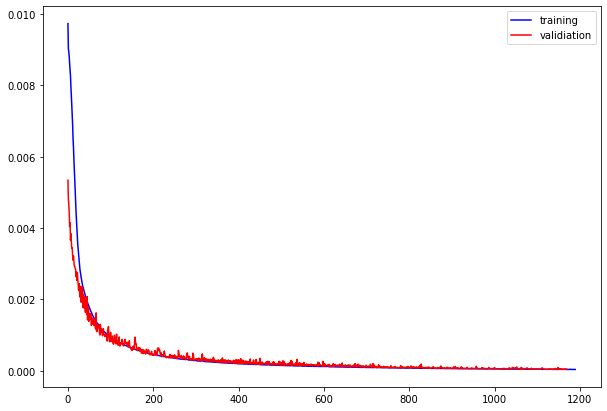

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnlstm_F.history.history['loss'][10:],'b',label='training')
plt.plot(cnnlstm_F.history.history['val_loss'][30:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = cnnlstm_F.predict(testX)

In [ ]:
testX.shape

(1115, 1, 120)

In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1115, 1)


(1115, 120)

In [ ]:
testPredict.shape

(1115, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
FORD_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,9.646190,9.386436,...,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517,9.450369
2002-06-26,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,9.646190,...,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517
2002-06-27,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,...,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875
2002-06-28,9.445471,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,...,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.5123

In [ ]:
FORD_cl.reset_index(inplace=True)
FORD_cl['Date'] = pd.to_datetime(FORD_cl['Date'])
FORD_cl.insert (1, 'Y', Y_n)
FORD_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
FORD_predict=pd.DataFrame(FORD_cl.tail(len(testPredict_n)))
FORD_predict.drop('Y',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
FORD_predict.insert (1, 'Y', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

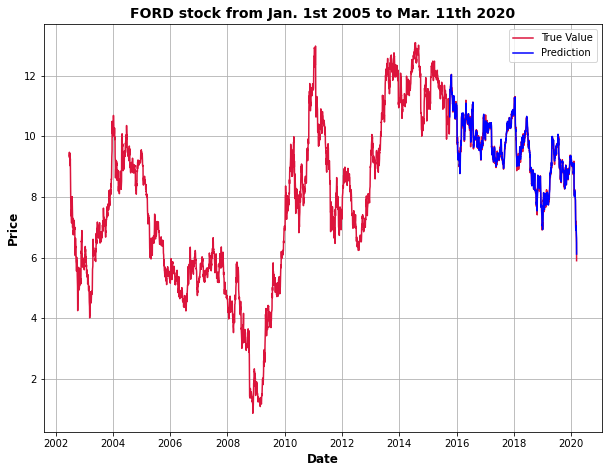

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_cl['Y'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y'],color='b',label='Prediction')
plt.title('FORD stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.0046254573

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.549825
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = cnnlstm.predict(testX)
#testPerdict= model.

(1115, 1, 120)


In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1115, 1)


(1115, 120)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
FORD_cl.reset_index(inplace=True)
FORD_cl['Date'] = pd.to_datetime(FORD_cl['Date'])
FORD_cl.insert (1, 'Y_1', Y_n)
FORD_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
FORD_predict=pd.DataFrame(FORD_cl.tail(len(testPredict_n)))
FORD_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
FORD_predict.reset_index(inplace=True)
FORD_predict['Date'] = pd.to_datetime(FORD_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
FORD_predict.insert (1, 'Y_1', testPredict_n)
FORD_predict.set_index('Date',inplace=True)

In [ ]:
FORD_cl.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,9.356924,9.356924,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,9.504508,...,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517,9.450369
2002-06-26,9.474989,9.474989,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,9.498600,...,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875,9.747517
2002-06-27,9.297887,9.297887,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,9.404149,...,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540,8.407452,8.448236,8.564763,8.716248,8.762860,8.943478,9.030871,8.908520,9.502807,9.648466,9.613509,9.869875
2002-06-28,9.309693,9.309693,9.445471,9.309693,9.297887,9.474989,9.356924,9.162109,9.286083,9.728836,9.988590,9.657998,9.380535,9.728836,9.846905,9.929553,9.911843,9.770160,9.888227,10.006298,9.988590,10.218822,10.419537,10.384118,10.466763,10.384118,10.472668,10.673386,10.738325,10.378210,9.876423,9.870522,9.787872,9.823294,9.734738,9.557642,9.345115,9.410051,9.445471,9.232950,...,9.233907,9.486170,9.175243,8.729387,8.975782,9.122445,8.934716,8.553392,8.606191,8.506461,8.377398,8.576860,8.623791,8.793921,8.412598,8.389131,8.436062,8.524059,8.271799,8.236597,8.582726,8.741120,8.975782,8.723522,8.752853,8.834986,8.512329,8.419106,8.471540

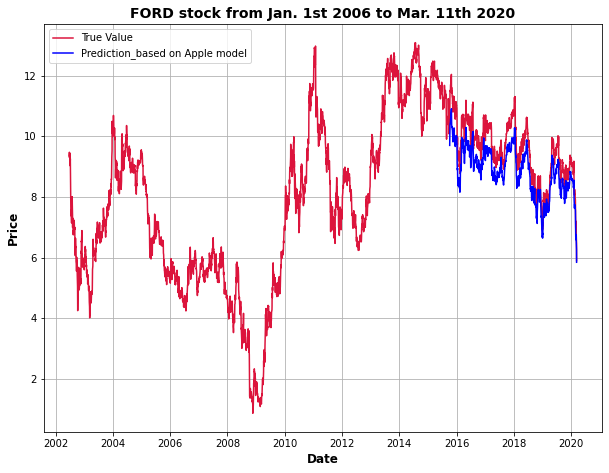

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(FORD_cl['Y_1'],color='#DC143C',label='True Value')
plt.plot(FORD_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('FORD stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.47111806

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    6.768726
dtype: float32

### EXON

In [ ]:
EXON.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,39.299999,39.599998,38.900002,39.599998,23.732252,11261900
2002-01-03,39.849998,39.980000,39.410000,39.660000,23.768194,10128200
2002-01-04,39.700001,40.070000,39.599998,40.000000,23.971949,8052100
2002-01-07,39.750000,40.090000,39.490002,39.650002,23.762201,9945700
2002-01-08,39.900002,39.990002,39.500000,39.700001,23.792166,8278000


Replace the "Adj Close" column (our response variable) to the first place:  

In [ ]:
EXON_cl = EXON[['Adj Close', 'Open','High','Low','Close','Volume']]
EXON_cl.head();

Constructing our database by defining how long we want to look back. In other words, todays's price is affected by how many days of historical data.

In [ ]:
memory_days=120 #Setting memory days for SVR look back (Number of predictors)
p_days=1 #Prediction days
for i in range(p_days,memory_days+p_days):
  text=str(i)
  op='Adj Close_'+text
  EXON_cl[op]=EXON_cl['Adj Close'].shift(i);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


drop the unnecceray columns.

In [ ]:
EXON_cl.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


drop very first rows of dataset (depend on the memory days)

In [ ]:
EXON_cl.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


save dataset

In [ ]:
# fix random seed for reproducibility
np.random.seed(4580)

In [ ]:
EXON_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,24.530437,24.216946,...,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194,23.732252
2002-06-26,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,24.530437,...,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194
2002-06-27,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,...,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949
2002-06-28,24.811731,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,...,

In [ ]:
dataset = EXON_cl.values
dataset = dataset.astype('float32')

In [ ]:
X=dataset[:,1:]
Y=dataset[:,1]

In [ ]:
X.shape

(4458, 120)

In [ ]:
Y.shape

(4458,)

In [ ]:
# normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y=Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)

test and train separation:

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
print(len(dataset))
print(len(trainX),len(testX))
print(len(trainY), len(testY))

4458
3343 1115
3343 1115


In [ ]:
testX.shape

(1115, 120)

In [ ]:
trainY.shape

(3343, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0],  1,testX.shape[1]))

In [ ]:
trainX.shape

(3343, 1, 120)

#### Training on Exon historical data


In [ ]:

cnnlstm_E = Sequential()
# define CNN model
input_layer = Input(shape=(1, 120))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
#lstm2 = LSTM(16, return_sequences=True)(lstm1)
#dense1 = Dense(16, activation='sigmoid')(lstm2)
output_layer = Dense(1)(lstm1)
cnnlstm_E = Model(inputs=input_layer, outputs=output_layer)
adam=optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
cnnlstm_E.compile(loss='mean_squared_error', optimizer=adam)
#cnnlstm.summary()

In [ ]:
cnnlstm_E.fit(trainX, trainY, validation_split=0.33, epochs=1200, batch_size=256, verbose=2);

Epoch 1/1200
9/9 - 0s - loss: 0.1534 - val_loss: 0.4522
Epoch 2/1200
9/9 - 0s - loss: 0.1169 - val_loss: 0.3336
Epoch 3/1200
9/9 - 0s - loss: 0.0851 - val_loss: 0.2313
Epoch 4/1200
9/9 - 0s - loss: 0.0567 - val_loss: 0.1428
Epoch 5/1200
9/9 - 0s - loss: 0.0336 - val_loss: 0.0768
Epoch 6/1200
9/9 - 0s - loss: 0.0169 - val_loss: 0.0325
Epoch 7/1200
9/9 - 0s - loss: 0.0068 - val_loss: 0.0094
Epoch 8/1200
9/9 - 0s - loss: 0.0025 - val_loss: 0.0030
Epoch 9/1200
9/9 - 0s - loss: 0.0019 - val_loss: 0.0032
Epoch 10/1200
9/9 - 0s - loss: 0.0020 - val_loss: 0.0030
Epoch 11/1200
9/9 - 0s - loss: 0.0019 - val_loss: 0.0027
Epoch 12/1200
9/9 - 0s - loss: 0.0017 - val_loss: 0.0029
Epoch 13/1200
9/9 - 0s - loss: 0.0018 - val_loss: 0.0029
Epoch 14/1200
9/9 - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 15/1200
9/9 - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 16/1200
9/9 - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 17/1200
9/9 - 0s - loss: 0.0017 - val_loss: 0.0027
Epoch 18/1200
9/9 - 0s - loss: 0.0017 - 

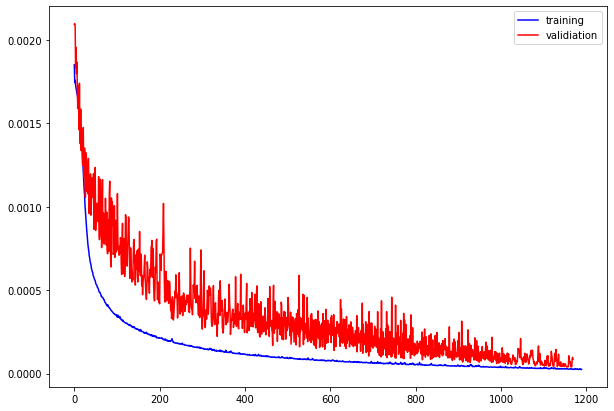

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cnnlstm_E.history.history['loss'][10:],'b',label='training')
plt.plot(cnnlstm_E.history.history['val_loss'][30:],'r',label='validiation')
plt.legend()
plt.show()

In [ ]:
# make predictions
testPredict = cnnlstm_E.predict(testX)

In [ ]:
testX.shape

(1115, 1, 120)

In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1115, 1)


(1115, 120)

In [ ]:
testPredict.shape

(1115, 1)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y'])

In [ ]:
EXON_cl.head()

,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,Adj Close_38,Adj Close_39,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,24.530437,24.216946,...,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194,23.732252
2002-06-26,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,24.530437,...,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194
2002-06-27,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,...,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949
2002-06-28,24.811731,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,...,

In [ ]:
EXON_cl.reset_index(inplace=True)
EXON_cl['Date'] = pd.to_datetime(EXON_cl['Date'])
EXON_cl.insert (1, 'Y', Y_n)
EXON_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
EXON_predict=pd.DataFrame(EXON_cl.tail(len(testPredict_n)))
EXON_predict.drop('Y',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y'])
EXON_predict.insert (1, 'Y', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

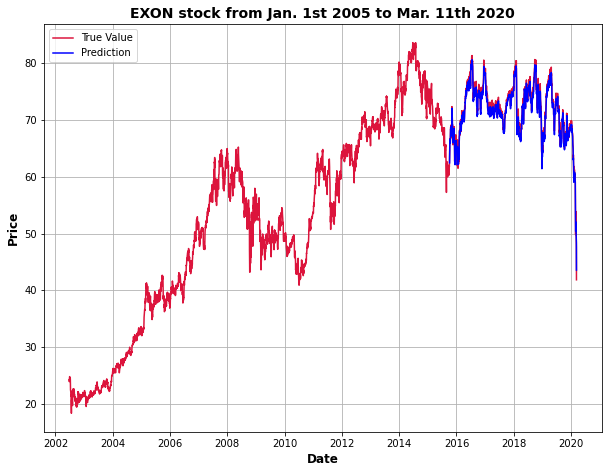

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_cl['Y'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y'],color='b',label='Prediction')
plt.title('EXON stock from Jan. 1st 2005 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

0.43469253

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y    0.775082
dtype: float32

#### Using the model trained on Apple data

In [ ]:
# make predictions
trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
trainY, testY = Y[0:train_size,:], Y[train_size:len(dataset),:]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testX.shape)
testPredict = cnnlstm.predict(testX)
#testPerdict= model.

(1115, 1, 120)


In [ ]:
testPredict=np.reshape(testPredict,(testPredict.shape[0],1))

In [ ]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[2]))
print(testPredict.shape)
testX.shape

(1115, 1)


(1115, 120)

In [ ]:
testPredict_n= scaler_Y.inverse_transform(testPredict)
testY_n= scaler_Y.inverse_transform(testY)
trainY_n= scaler_Y.inverse_transform(trainY)

In [ ]:
Y_n=np.concatenate((trainY_n,testY_n))
Y_n=pd.DataFrame(Y_n,columns=['Y_1'])

In [ ]:
EXON_cl.reset_index(inplace=True)
EXON_cl['Date'] = pd.to_datetime(EXON_cl['Date'])
EXON_cl.insert (1, 'Y_1', Y_n)
EXON_cl.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
EXON_predict=pd.DataFrame(EXON_cl.tail(len(testPredict_n)))
EXON_predict.drop('Y_1',inplace=True,axis=1)

In [ ]:
EXON_predict.reset_index(inplace=True)
EXON_predict['Date'] = pd.to_datetime(EXON_predict['Date'])
testPredict_n=pd.DataFrame(testPredict_n,columns=['Y_1'])
EXON_predict.insert (1, 'Y_1', testPredict_n)
EXON_predict.set_index('Date',inplace=True)

In [ ]:
EXON_cl.head()

,Y_1,Y,Adj Close,Adj Close_1,Adj Close_2,Adj Close_3,Adj Close_4,Adj Close_5,Adj Close_6,Adj Close_7,Adj Close_8,Adj Close_9,Adj Close_10,Adj Close_11,Adj Close_12,Adj Close_13,Adj Close_14,Adj Close_15,Adj Close_16,Adj Close_17,Adj Close_18,Adj Close_19,Adj Close_20,Adj Close_21,Adj Close_22,Adj Close_23,Adj Close_24,Adj Close_25,Adj Close_26,Adj Close_27,Adj Close_28,Adj Close_29,Adj Close_30,Adj Close_31,Adj Close_32,Adj Close_33,Adj Close_34,Adj Close_35,Adj Close_36,Adj Close_37,...,Adj Close_81,Adj Close_82,Adj Close_83,Adj Close_84,Adj Close_85,Adj Close_86,Adj Close_87,Adj Close_88,Adj Close_89,Adj Close_90,Adj Close_91,Adj Close_92,Adj Close_93,Adj Close_94,Adj Close_95,Adj Close_96,Adj Close_97,Adj Close_98,Adj Close_99,Adj Close_100,Adj Close_101,Adj Close_102,Adj Close_103,Adj Close_104,Adj Close_105,Adj Close_106,Adj Close_107,Adj Close_108,Adj Close_109,Adj Close_110,Adj Close_111,Adj Close_112,Adj Close_113,Adj Close_114,Adj Close_115,Adj Close_116,Adj Close_117,Adj Close_118,Adj Close_119,Adj Close_120
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-06-25,24.253881,24.253881,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,24.596752,...,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194,23.732252
2002-06-26,24.011364,24.011364,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,24.470154,...,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949,23.768194
2002-06-27,23.920397,23.920397,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,23.662312,...,25.712040,25.320189,24.898184,24.669100,24.548529,24.717323,24.548529,23.602036,23.505571,23.372946,23.451313,23.511599,23.294573,23.149891,23.210171,23.083578,23.089600,23.324713,22.971125,22.983109,23.372662,23.402624,23.186876,22.743393,23.348688,23.468542,23.252794,23.312721,22.785349,23.013081,23.156916,23.073006,23.552456,23.156916,23.073006,23.606386,23.516485,23.792166,23.762201,23.971949
2002-06-28,24.405481,24.405481,24.811731,24.405481,23.920397,24.011364,24.253881,23.799122,24.096241,23.871889,24.211447,24.272072,23.738497,23.865833,24.071987,23.665730,23.726370,23.902205,23.738497,23.987089,23.786997,23.696047,24.211447,23.859766,24.435793,24.156881,24.393345,24.799597,24.514616,24.114420,24.005285,24.375160,24.417604,24.078051,24.605570,24.259956,23.623283,23.865833,24.120489,23.571901,...,25.621624,25.712040,

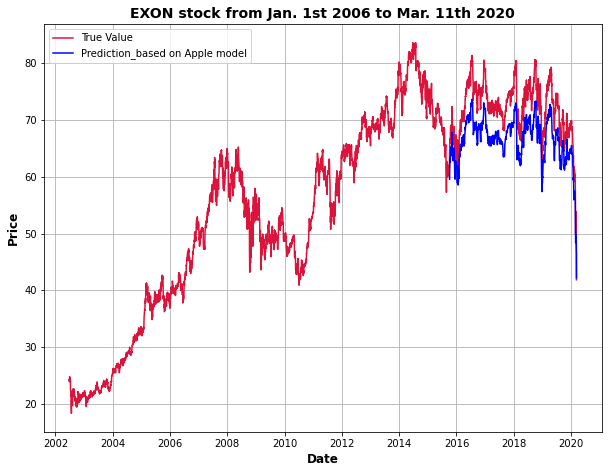

In [ ]:
plt.figure(figsize=[10,7.5])
plt.plot(EXON_cl['Y_1'],color='#DC143C',label='True Value')
plt.plot(EXON_predict['Y_1'],color='b',label='Prediction_based on Apple model')
plt.title('EXON stock from Jan. 1st 2006 to Mar. 11th 2020',weight='bold',size=14)
plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price',weight='bold',size=12)
plt.grid(True)
plt.legend();

In [ ]:
mse=mean_squared_error(testY_n,testPredict_n)
mse

29.986036

In [ ]:
mean_absolute_percentage_error(testY_n, testPredict_n)

Y_1    7.391403
dtype: float32